# IMPLICATION:-

# THIS MACHINE LEANING MODEL HELP REAL ESTATE DOAMIN TO IDENTIFY WHICH FACTORS AFFECT THE U.S HOME PRICE OVER PAST 20 YEARS AND WHICH KEY FACTORS INFLUENCE MOST 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Now we import the all our csv files 

In [2]:
# let's import our csv file into pandas dataframe
home_prices=pd.read_csv(r"C:\Users\shubh\Downloads\Home prices.csv")

# I HVAE IMPORTED ALL THIS CSV FILE FROM THE SOURCE NAME :- https://fred.stlouisfed.org/series/FEDFUNDS
# As a proxy to the home prices, S&P CASE-SHILLER Index is use
# ALL THE CSV FILE I HAVE DOWNLAODED FROM THE THIS PUBLIC SOURCE AND PUT IT IN THE EXCEL AND THEN IMPORTED HERE 
# POPULATION FEATURE :- TAKEN FROM SOURCE :- https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?end=2021&locations=US&start=2001

# REFRENCES :-
# https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx
# https://www.quickenloans.com/learn/housing-market-indicators

# ALL THESE ARE SOURCE FROM WHERE DATA DOWNLAODED AND TAKEN AS REFRENCES 

In [3]:
home_prices

Date    CPI  Interest Rate  Unemployment rate  \
0    01-01-2002   58.7           1.73                5.7   
1    01-02-2002  102.6           1.74                5.7   
2    01-03-2002  146.0           1.73                5.7   
3    01-04-2002  145.1           1.75                5.9   
4    01-05-2002    0.0           1.75                5.8   
..          ...    ...            ...                ...   
250  01-11-2022  -26.2           3.78                3.6   
251  01-12-2022  -79.7           4.10                3.5   
252         NaN    NaN            NaN                NaN   
253         NaN    NaN            NaN                NaN   
254         NaN    NaN            NaN                NaN   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
250                                1488.1                 122.8   
251                                1470.5                 110.6   
252                                   NaN                   NaN   
253                                   NaN                   NaN   
254                                   NaN                   NaN   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   
252                      NaN              NaN               NaN   
253                      NaN              NaN               NaN   
254                      NaN              NaN               NaN   

     House Price Index        GDP  per capita income  Total Household   \
0                 81.4   132138.0           50091.00          109297.0   
1                 81.7   140168.0           50156.00          109297.0   
2                 82.4   140509.0           50221.00          109297.0   
3                 83.3   149394.0           50286.00          109297.0   
4                 84.4   144274.0           50311.33          109297.0   
..                 ...        ...                ...               ...   
250              207.6  6920709.0           65881.33          131202.0   
251              205.8  6920709.0           65979.67          131202.0   
252                NaN        NaN                NaN               NaN   
253                NaN        NaN                NaN               NaN   
254                NaN        NaN                NaN               NaN   

     Working contruction completed  Subsidies  Economy_policy_taxes  \
0                            238.7     24.183                172.93   
1                            232.1     24.183                 86.60   
2                            252.7     24.183                 82.61   
3                            243.6     24.183                 72.46   
4                            249.4     24.183                 76.25   
..                             ...        ...                   ...   
250                          202.2     48.021                119.52   
251                          214.6     48.021                 95.10   
252                          201.2        NaN                   NaN   
253                          230.3        NaN                   NaN   
254       

# IN THIS DATASET SOME FEATURE ARE GIVEN AND THESE ARE AFFECTING OUR VARIBALE "HOME PRICE " WHICH IS OUR LABEL THAT WE HAVE TO PREDICT BY BUILDING THE MODEL
# AND THIS MACHINE LEARNING MODEL WILL BE OF REGRESSION TYPE BECAUSE LABEL DATA IS CONTNOUS IN NATURE 

In [4]:
home_prices.head(5)

Date    CPI  Interest Rate  Unemployment rate  \
0  01-01-2002   58.7           1.73                5.7   
1  01-02-2002  102.6           1.74                5.7   
2  01-03-2002  146.0           1.73                5.7   
3  01-04-2002  145.1           1.75                5.9   
4  01-05-2002    0.0           1.75                5.8   

   Producer Price index for contruction  New contructed House  \
0                                 639.6                 129.8   
1                                 640.5                 132.9   
2                                 645.0                 124.0   
3                                 646.4                 129.3   
4                                 647.7                 135.6   

   Working Population age   Personal Income  Employement rate  \
0                    135.1             73.5             108.0   
1                    135.3             73.6             108.4   
2                    135.5             73.8             108.1   
3                    135.6             74.2             107.8   
4                    135.8             74.4             108.0   

   House Price Index       GDP  per capita income  Total Household   \
0               81.4  132138.0           50091.00          109297.0   
1               81.7  140168.0           50156.00          109297.0   
2               82.4  140509.0           50221.00          109297.0   
3               83.3  149394.0           50286.00          109297.0   
4               84.4  144274.0           50311.33          109297.0   

   Working contruction completed  Subsidies  Economy_policy_taxes  \
0                          238.7     24.183                172.93   
1                          232.1     24.183                 86.60   
2                          252.7     24.183                 82.61   
3                          243.6     24.183                 72.46   
4                          249.4     24.183                 76.25   

   Global_Economic_policy  Consumer_sentiment  Stock_market_Equity  \
0                  107.13                85.2                99.32   
1                   89.99                83.1                69.82   
2                   78.67                87.6                43.46   
3                   83.63                85.2                56.45   
4                   79.20                88.7                42.62   

   Personal_consume_Expenditure  
0                        107.57  
1                        108.18  
2                        108.45  
3                        109.48  
4                        109.13

AS WE CAN SEE THAT WE HAVE IMPORT OUR CSV FILE AND MADE A DATAFRAME NOW WE WILL CLEAN OUR DATASET 

In [5]:
home_prices.columns

Index(['Date', 'CPI', 'Interest Rate', 'Unemployment rate',
       'Producer Price index for contruction', 'New contructed House',
       'Working Population age ', 'Personal Income', 'Employement rate',
       'House Price Index', 'GDP', 'per capita income', 'Total Household ',
       'Working contruction completed', 'Subsidies', 'Economy_policy_taxes',
       'Global_Economic_policy', 'Consumer_sentiment', 'Stock_market_Equity',
       'Personal_consume_Expenditure'],
      dtype='object')

In [ ]:
# let's drop the table 
home_prices= home_prices.drop('T20YIEM_NBD20100201', axis=1)

In [7]:
home_prices

Date    CPI  Interest Rate  Unemployment rate  \
0    01-01-2002   58.7           1.73                5.7   
1    01-02-2002  102.6           1.74                5.7   
2    01-03-2002  146.0           1.73                5.7   
3    01-04-2002  145.1           1.75                5.9   
4    01-05-2002    0.0           1.75                5.8   
..          ...    ...            ...                ...   
250  01-11-2022  -26.2           3.78                3.6   
251  01-12-2022  -79.7           4.10                3.5   
252         NaN    NaN            NaN                NaN   
253         NaN    NaN            NaN                NaN   
254         NaN    NaN            NaN                NaN   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
250                                1488.1                 122.8   
251                                1470.5                 110.6   
252                                   NaN                   NaN   
253                                   NaN                   NaN   
254                                   NaN                   NaN   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   
252                      NaN              NaN               NaN   
253                      NaN              NaN               NaN   
254                      NaN              NaN               NaN   

     House Price Index        GDP  per capita income  Total Household   \
0                 81.4   132138.0           50091.00          109297.0   
1                 81.7   140168.0           50156.00          109297.0   
2                 82.4   140509.0           50221.00          109297.0   
3                 83.3   149394.0           50286.00          109297.0   
4                 84.4   144274.0           50311.33          109297.0   
..                 ...        ...                ...               ...   
250              207.6  6920709.0           65881.33          131202.0   
251              205.8  6920709.0           65979.67          131202.0   
252                NaN        NaN                NaN               NaN   
253                NaN        NaN                NaN               NaN   
254                NaN        NaN                NaN               NaN   

     Working contruction completed  Subsidies  Economy_policy_taxes  \
0                            238.7     24.183                172.93   
1                            232.1     24.183                 86.60   
2                            252.7     24.183                 82.61   
3                            243.6     24.183                 72.46   
4                            249.4     24.183                 76.25   
..                             ...        ...                   ...   
250                          202.2     48.021                119.52   
251                          214.6     48.021                 95.10   
252                          201.2        NaN                   NaN   
253                          230.3        NaN                   NaN   
254       

In [8]:
home_prices.shape

(255, 20)

AS WE CAN CLEALRY SEE THAT OUR DATASET CONTAIN 255 ROWS AND 20 COLUMNS 

In [9]:
# NOW WE CHECK THE NULL VALUES IN OUR DATASET 
home_prices.isnull().sum()

Date                                    3
CPI                                     3
Interest Rate                           3
Unemployment rate                       3
Producer Price index for contruction    3
New contructed House                    3
Working Population age                  3
Personal Income                         3
Employement rate                        3
House Price Index                       3
GDP                                     3
per capita income                       3
Total Household                         3
Working contruction completed           0
Subsidies                               3
Economy_policy_taxes                    3
Global_Economic_policy                  3
Consumer_sentiment                      3
Stock_market_Equity                     3
Personal_consume_Expenditure            3
dtype: int64

AS WE CAN CLEALRY SEE THAT OUR DATASET HAVE SOME NULL VALUES BUT IF WE LOOK PROPERLY TO OUR DATASET ALL THE NULL VALUES ARE 3 EXCEPT '20YIEM_NBD20100201' THIS COLUMN AND E ALSO SEE ALL THIS 3 NULL VALUES COLUMNS HAVE SAME NULL VALUES IN THE ROWS 252, 253,254 SO IT IS BETTER TO DROP THE ROWS 

In [10]:
# NOW WE DROP THE NULL VALUES FROM OUR DATASET 
home_prices.dropna(inplace=True)

# SPECIAL NOTE THAT I HAVE NOT USED MEDIAN , MODE , MEAN TO FILL THE DATA BECAUSE ALL THE VARIABLE CANGES DUE TO CHANGE IN TIME AND ALL DATA HAVE NULL VALUES IN ALL THE ROWS 

In [11]:
home_prices.isnull().sum()

Date                                    0
CPI                                     0
Interest Rate                           0
Unemployment rate                       0
Producer Price index for contruction    0
New contructed House                    0
Working Population age                  0
Personal Income                         0
Employement rate                        0
House Price Index                       0
GDP                                     0
per capita income                       0
Total Household                         0
Working contruction completed           0
Subsidies                               0
Economy_policy_taxes                    0
Global_Economic_policy                  0
Consumer_sentiment                      0
Stock_market_Equity                     0
Personal_consume_Expenditure            0
dtype: int64

AS WE CAN SEE CLEALRY ALL THE NULL VALUES WE HAVE REMOVED FROM OUR DATASET T20YIEM_NBD20100201(INFLATION RATE) THIS COLUMN BECAUSE THIS COLUMN DEPICT INFLATION RATE SO IF USE ANY OF THESE WILL BE WRONG BECAUSE INFLATION RATE CHANGES WITH TIME 

In [12]:
home_prices

Date    CPI  Interest Rate  Unemployment rate  \
0    01-01-2002   58.7           1.73                5.7   
1    01-02-2002  102.6           1.74                5.7   
2    01-03-2002  146.0           1.73                5.7   
3    01-04-2002  145.1           1.75                5.9   
4    01-05-2002    0.0           1.75                5.8   
..          ...    ...            ...                ...   
247  01-08-2022   -9.2           2.33                3.7   
248  01-09-2022   55.8           2.56                3.5   
249  01-10-2022  105.3           3.08                3.7   
250  01-11-2022  -26.2           3.78                3.6   
251  01-12-2022  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index        GDP  per capita income  Total Household   \
0                 81.4   132138.0           50091.00          109297.0   
1                 81.7   140168.0           50156.00          109297.0   
2                 82.4   140509.0           50221.00          109297.0   
3                 83.3   149394.0           50286.00          109297.0   
4                 84.4   144274.0           50311.33          109297.0   
..                 ...        ...                ...               ...   
247              212.3  6701519.0           65569.00          131202.0   
248              210.1  6546655.0           65676.00          131202.0   
249              208.8  6802375.0           65783.00          131202.0   
250              207.6  6920709.0           65881.33          131202.0   
251              205.8  6920709.0           65979.67          131202.0   

     Working contruction completed  Subsidies  Economy_policy_taxes  \
0                            238.7     24.183                172.93   
1                            232.1     24.183                 86.60   
2                            252.7     24.183                 82.61   
3                            243.6     24.183                 72.46   
4                            249.4     24.183                 76.25   
..                             ...        ...                   ...   
247                          215.8     48.021                103.00   
248                          207.8     48.021                 67.00   
249                          208.4     48.021                111.74   
250                          202.2     48.021                119.52   
251       

In [13]:
# LET'S CHECK ANY DUPLICATED VALUES IN OUR DATASET 
home_prices.duplicated().sum()

0

AS WE CAN SEE THAT AFTER REMOVING NULL VALUES FROM OUR DATASET WE HVAE CHECKED THE DUPLICATED VALUES SO NO DUPLIACTED VALIES PRESENT 

In [14]:
# NOW WE CHECK SOME DATATYPES OUR COLUMNS
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  252 non-null    object 
 1   CPI                                   252 non-null    float64
 2   Interest Rate                         252 non-null    float64
 3   Unemployment rate                     252 non-null    float64
 4   Producer Price index for contruction  252 non-null    float64
 5   New contructed House                  252 non-null    float64
 6   Working Population age                252 non-null    float64
 7   Personal Income                       252 non-null    float64
 8   Employement rate                      252 non-null    float64
 9   House Price Index                     252 non-null    float64
 10  GDP                                   252 non-null    float64
 11  per capita income  

AS WE CAN SEE THAT OUR DATE COLUMN HAVE OBJECT DATATYPE SO WEHAVE TI CONVERT IT INTO DATETIME DATTYPE 

In [15]:
home_prices['Date'] = pd.to_datetime(home_prices['Date'])

In [16]:
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  252 non-null    datetime64[ns]
 1   CPI                                   252 non-null    float64       
 2   Interest Rate                         252 non-null    float64       
 3   Unemployment rate                     252 non-null    float64       
 4   Producer Price index for contruction  252 non-null    float64       
 5   New contructed House                  252 non-null    float64       
 6   Working Population age                252 non-null    float64       
 7   Personal Income                       252 non-null    float64       
 8   Employement rate                      252 non-null    float64       
 9   House Price Index                     252 non-null    float64       
 10  GD

AS WE CAN SEE WE HAVE CONVERTED OUR OBJECT DATATYPE INTO DATETIME FORMAT BUT WE HVAE STILL BREAK THE DATE INTO MONTH YEAR DAYS

In [17]:
# NOW WE BREAK OUR DATE FORMAT INTO MONTH , YEAR AND DAYS
home_prices['Month'] = home_prices['Date'].dt.month
home_prices['Year'] = home_prices['Date'].dt.year
home_prices['Day'] = home_prices['Date'].dt.day

In [18]:
home_prices

Date    CPI  Interest Rate  Unemployment rate  \
0   2002-01-01   58.7           1.73                5.7   
1   2002-01-02  102.6           1.74                5.7   
2   2002-01-03  146.0           1.73                5.7   
3   2002-01-04  145.1           1.75                5.9   
4   2002-01-05    0.0           1.75                5.8   
..         ...    ...            ...                ...   
247 2022-01-08   -9.2           2.33                3.7   
248 2022-01-09   55.8           2.56                3.5   
249 2022-01-10  105.3           3.08                3.7   
250 2022-01-11  -26.2           3.78                3.6   
251 2022-01-12  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index  ...  Working contruction completed  Subsidies  \
0                 81.4  ...                          238.7     24.183   
1                 81.7  ...                          232.1     24.183   
2                 82.4  ...                          252.7     24.183   
3                 83.3  ...                          243.6     24.183   
4                 84.4  ...                          249.4     24.183   
..                 ...  ...                            ...        ...   
247              212.3  ...                          215.8     48.021   
248              210.1  ...                          207.8     48.021   
249              208.8  ...                          208.4     48.021   
250              207.6  ...                          202.2     48.021   
251              205.8  ...                          214.6     48.021   

     Economy_policy_taxes  Global_Economic_policy  Consumer_sentiment  \
0                  172.93                  107.13                85.2   
1                   86.60                   89.99                83.1   
2                   82.61                   78.67                87.6   
3                   72.46                   83.63                85.2   
4                   76.25                   79.20                88.7   
..                    ...                     ...                 ...   
247                103.00                  254.98                53.3   
248                 67.00                  279.90                53.7   
249                111.74                  298.58                54.9   
250                119.52                  329.37                51.9   
251        

In [19]:
home_prices['House Price Index'].value_counts()

122.4    6
100.6    3
128.9    3
100.9    3
128.4    3
        ..
104.7    1
105.4    1
105.3    1
104.6    1
205.8    1
Name: House Price Index, Length: 213, dtype: int64

In [20]:
for i in home_prices.columns:
    print(home_prices[i].value_counts())
    print("********************************")
    

2002-01-01    1
2016-01-06    1
2015-01-05    1
2015-01-06    1
2015-01-07    1
             ..
2009-01-05    1
2009-01-06    1
2009-01-07    1
2009-01-08    1
2022-01-12    1
Name: Date, Length: 252, dtype: int64
********************************
 58.7    2
 30.2    2
-10.1    2
 0.0     2
 14.4    2
        ..
-41.1    1
 58.2    1
 16.2    1
 25.0    1
-79.7    1
Name: CPI, Length: 241, dtype: int64
********************************
0.09    20
0.08    16
0.16    11
5.25     8
0.12     8
        ..
2.50     1
0.21     1
2.63     1
0.22     1
4.10     1
Name: Interest Rate, Length: 114, dtype: int64
********************************
5.0    13
4.7    12
3.6    10
5.7    10
6.1     9
       ..
9.3     1
8.7     1
6.8     1
6.5     1
8.4     1
Name: Unemployment rate, Length: 63, dtype: int64
********************************
962.6     4
966.2     3
945.0     3
747.3     3
969.8     3
         ..
845.0     1
852.7     1
854.5     1
852.3     1
1470.5    1
Name: Producer Price index for contr

In [21]:
# NOW WE CHECK NUMNER OF UNIQUE VALUES IN EACH COLUMNS
home_prices.nunique().to_frame("no of unique values")

no of unique values
Date                                                  252
CPI                                                   241
Interest Rate                                         114
Unemployment rate                                      63
Producer Price index for contruction                  214
New contructed House                                  223
Working Population age                                135
Personal Income                                       236
Employement rate                                       85
House Price Index                                     213
GDP                                                   251
per capita income                                     251
Total Household                                        21
Working contruction completed                         231
Subsidies                                              21
Economy_policy_taxes                                  250
Global_Economic_policy                                251
Consumer_sentiment                                    182
Stock_market_Equity                                   249
Personal_consume_Expenditure                          250
Month                                                   1
Year                                                   21
Day                                                    12

AS WE CAN SEE THAT OUR TARGET VARIABLE 'House Price Index' HAVE 213 VARIALES AND DAY COLUMN HAVE ONLY 1 UNIQUE VARIABLE SO THERE IS NO NEED FOR THAT SO WE CAN DROP THAT FROM OUR DATASET

In [22]:
# LET'S DROP THE COLUMN DAY FROM OUR DATATSET 
home_prices=home_prices.drop('Month',axis=1)

In [23]:
home_prices.rename(columns={"Total Household": "Total_household"}, inplace=True)

In [24]:
home_prices.rename(columns={'Working Population age': 'working_age_population'}, inplace=True)

In [25]:
home_prices

Date    CPI  Interest Rate  Unemployment rate  \
0   2002-01-01   58.7           1.73                5.7   
1   2002-01-02  102.6           1.74                5.7   
2   2002-01-03  146.0           1.73                5.7   
3   2002-01-04  145.1           1.75                5.9   
4   2002-01-05    0.0           1.75                5.8   
..         ...    ...            ...                ...   
247 2022-01-08   -9.2           2.33                3.7   
248 2022-01-09   55.8           2.56                3.5   
249 2022-01-10  105.3           3.08                3.7   
250 2022-01-11  -26.2           3.78                3.6   
251 2022-01-12  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index  ...  Total Household   Working contruction completed  \
0                 81.4  ...          109297.0                          238.7   
1                 81.7  ...          109297.0                          232.1   
2                 82.4  ...          109297.0                          252.7   
3                 83.3  ...          109297.0                          243.6   
4                 84.4  ...          109297.0                          249.4   
..                 ...  ...               ...                            ...   
247              212.3  ...          131202.0                          215.8   
248              210.1  ...          131202.0                          207.8   
249              208.8  ...          131202.0                          208.4   
250              207.6  ...          131202.0                          202.2   
251              205.8  ...          131202.0                          214.6   

     Subsidies  Economy_policy_taxes  Global_Economic_policy  \
0       24.183                172.93                  107.13   
1       24.183                 86.60                   89.99   
2       24.183                 82.61                   78.67   
3       24.183                 72.46                   83.63   
4       24.183                 76.25                   79.20   
..         ...                   ...                     ...   
247     48.021                103.00                  254.98   
248     48.021                 67.00                  279.90   
249     48.021                111.74                  298.58   
250     48.021                119.52                  329.37   
251     48.021            

# STATISTICAL OVERVIEW

In [26]:
# NOW WE CHECK THE STATISTICAL OVERVIEW OF DATASET
home_prices.describe()

CPI  Interest Rate  Unemployment rate  \
count  252.000000     252.000000         252.000000   
mean    53.662302       1.319008           6.001190   
std    103.429430       1.542732           1.985615   
min   -497.000000       0.050000           3.500000   
25%     -7.250000       0.120000           4.600000   
50%     52.250000       0.715000           5.550000   
75%    122.325000       1.935000           7.200000   
max    356.500000       5.260000          14.700000   

       Producer Price index for contruction  New contructed House  \
count                            252.000000            252.000000   
mean                             944.028571             97.284127   
std                              206.768670             33.769049   
min                              639.600000             41.400000   
25%                              825.350000             67.250000   
50%                              929.300000             96.050000   
75%                             1005.900000            123.100000   
max                             1590.200000            178.600000   

       Working Population age   Personal Income  Employement rate  \
count               252.000000       252.000000        252.000000   
mean                147.525794       117.361111        104.355952   
std                   5.150199        30.020171          3.107773   
min                 135.100000        73.500000         90.200000   
25%                 144.500000        96.625000        101.675000   
50%                 149.100000       112.850000        105.350000   
75%                 152.000000       137.475000        107.000000   
max                 153.600000       199.500000        108.400000   

       House Price Index           GDP  ...  Total Household   \
count         252.000000  2.520000e+02  ...        252.000000   
mean          124.347222  2.165200e+06  ...     120770.761905   
std            29.508294  1.842884e+06  ...       6496.223206   
min            81.400000  1.321380e+05  ...     109297.000000   
25%           102.400000  4.781308e+05  ...     116011.000000   
50%           118.400000  1.628852e+06  ...     121084.000000   
75%           136.250000  3.616212e+06  ...     126224.000000   
max           215.500000  6.920709e+06  ...     131202.000000   

       Working contruction completed   Subsidies  Economy_policy_taxes  \
count                     252.000000  252.000000            252.000000   
mean                      182.851587   34.177714            116.560198   
std                        63.581136    6.274362             73.772301   
min                        77.600000   24.183000             23.050000   
25%                       126.225000   29.512000             66.605000   
50%                       180.200000   33.283000             98.755000   
75%                       235.025000   37.550000            139.872500   
max                       335.100000   48.021000            433.290000   

       Global_Economic_policy  Consumer_sentiment  Stock_market_Equity  \
count              252.000000          252.000000           252.000000   
mean               147.495476           75.742857            57.634167   
std                 75.380356           11.402536            26.179931   
min                 48.950000           45.800000            13.670000   
25%                 92.560000           67.400000            41.310000   
50%                126.835000           77.650000            51.775000   
75%                188.280000           85.300000            66.510000   
max                428.100000           95.100000           209.810000   

       Personal_consume_Expenditure         Year         Day  
count                    252.000000   252.000000  252.000000  
mean                     171.646151  2012.000000    6.500000  
std                       40.090161     6.067351    3.458922  
min                      107.570000  2002.000000    1.000000  
25%                      144.262500  20

1. AS WE CAN SEE THAT THERE ARE ALMOST SAME COUNT FOR ALL THE COLUMN IN THE DATASET WHICH TGELL US THAT THERE ARE NO NULL VALUES   PRESENT IN THE DATASET

2. AS WE CAN SEE THAT FOR ALL THE COLUMNS THE MEAN IS GRAETEAR THAN 50% WHICH MEANS THAT THIS DATASET VALUES RIGHT SKWENESS 

3. AS WE CAN ALSO SEE THAT MAX IS GFRAETEAR THAN 75% WHICH TELL US THAT THERE MAYBE VERY HIGHER CHANCE OF OUT.IERS PRESENT IN THE DATASET BUT FISRTS WE HAVE TO CHECK THAT SO WE HAVE TOI FIND THAT

# EXPLORATARY DATA ANALYSIS ( EDA)

<AxesSubplot:xlabel='Unemployment rate', ylabel='count'>

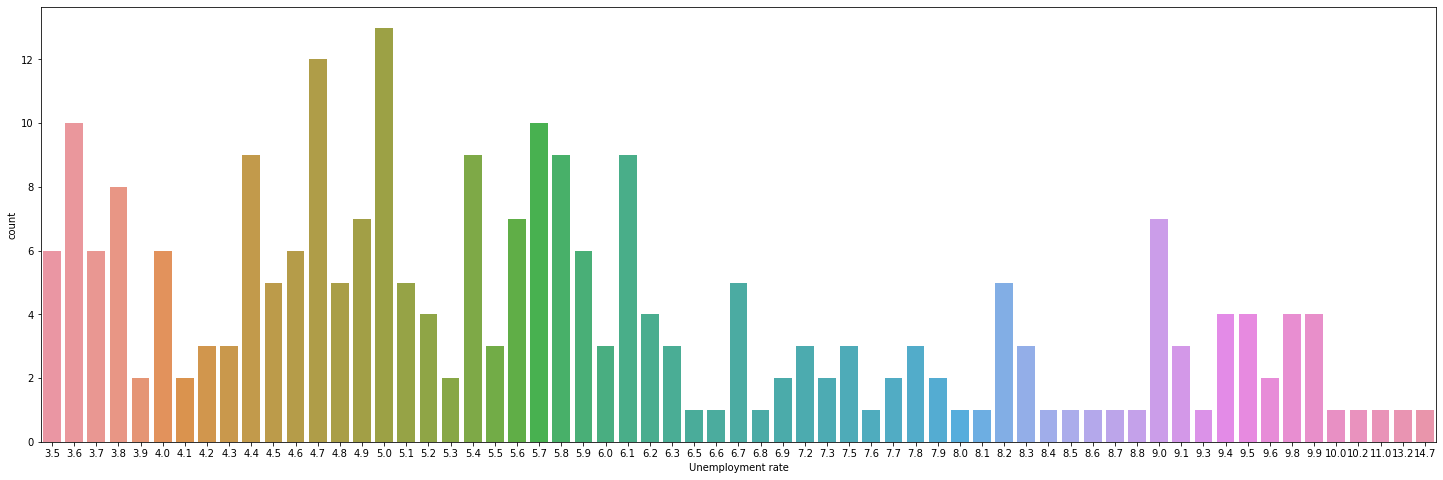

In [42]:
# LET'S SOME GRAPH COUNTPLOT TO CHEK DETAILS 
plt.figure(figsize=(25,8))
sns.countplot(x="Unemployment rate",data=home_price)

AS WE CAN SEE THE DISTRIBUTION OF UNEMPLOYEMENT RATE ALONG THE DATASTE 

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Year', ylabel='Unemployment rate'>

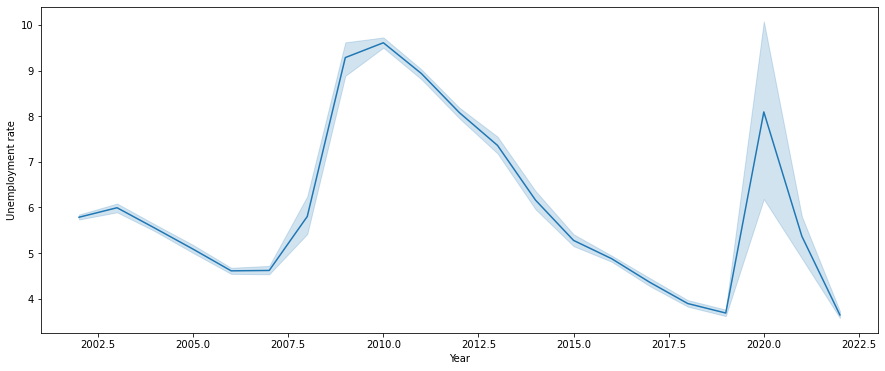

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(y="Unemployment rate",x="Year",data=home_price)

IAS WE CAN SEE OVER PEIOD OF YEAR SOMETIME WHEN IT WAS RECESSION THE UNEMPLOYEMNT FRATE WAS HIGH AND WHEN IT WAS NOT RECESSION EMPLOYEMNT RATE WAS GOOD 
SO WE CAN SEE 2088 AND DURING COVID PERIOD WE CAN SEEEMPLOYEMENT RATE ARE AT IT PEAK AND AFTER THAT IT RECOVERS FASTLY AS MANY SHOPS WERE CLOSED AND MANY PEPELE LOOSE JOB BUSINESS LOSS 

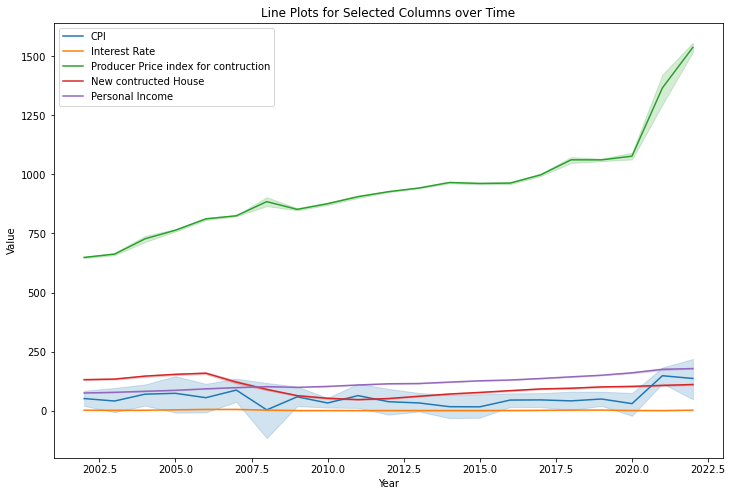

In [48]:
columns_to_plot = ["CPI", "Interest Rate", "Producer Price index for contruction", "New contructed House", "Personal Income"]

plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    sns.lineplot(data=home_price, x="Year", y=home_price[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Plots for Selected Columns over Time')
plt.legend()
plt.show()

<AxesSubplot:xlabel='House Price Index', ylabel='per capita income'>

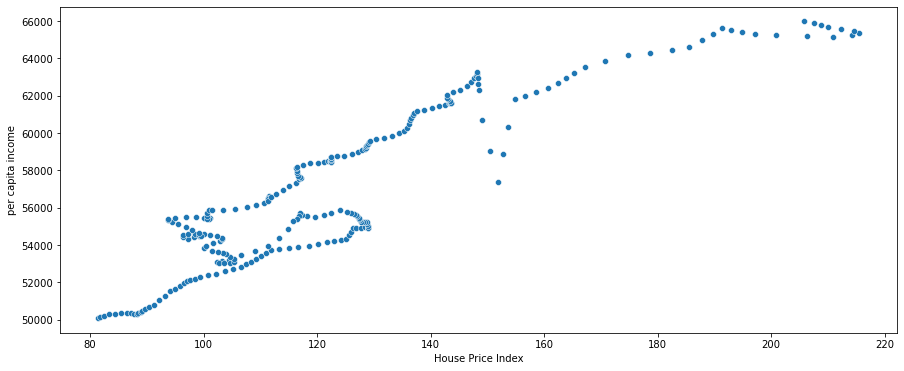

In [68]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="House Price Index",y="per capita income",data=home_price)

 AS WE CAN CLEALRY SEE THAT THERE IS POSITIVE CORREALTION BECAUSE AS PER CAPITA INCOME OF THE PERSON INCREASES THE HOUSE PRICE INDEX ALSO INCREASES THIS SUGGEST THAT IF PER CAPITA INCOME INCREASES THEN PEOPLE MORE LIKELY TO BU THE HOUSE MORE AND HOUSE PRICES WILL ALSO GET SURGE HIGH 

#WE ALSO KNOW THAT WHEN SOME PERSON PER CAPITA INCOME INCRESES RAPIDY THEN ALSO MORE LIKELY TO INVEST IN REAL ESTATE SO IT OVERALL INCREASES THE HOUSING PRICE WITH BIG AMOUNT 

<AxesSubplot:xlabel='House Price Index', ylabel='Unemployment rate'>

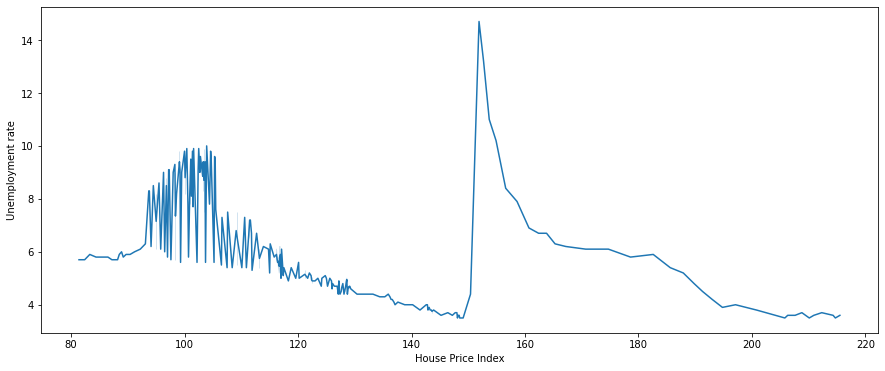

In [72]:
plt.figure(figsize=(15,6))
sns.lineplot(x="House Price Index",y="Unemployment rate",data=home_price)

GENERALLY WE CAN SEE THAT THERE IS NEGATIVE CORRELATION UNEMPLOYEMENT WITH HOME PRICE AS UNEMPLOYEMENT RATE WILL GET HIGH THE HOUSE PRICE INDEX WILL BE ALSO GET AFFECTED INVERSELY WE CAN SEE IT IN THE PLOT AS WELL GENERALLY WHEN UNEMPLOYEMET RATE INCREASES THERE IS DECRAESES IN PURCHASING THE HOUSE SO PRICE ALSO GTE DOWN 

<AxesSubplot:xlabel='Personal Income', ylabel='House Price Index'>

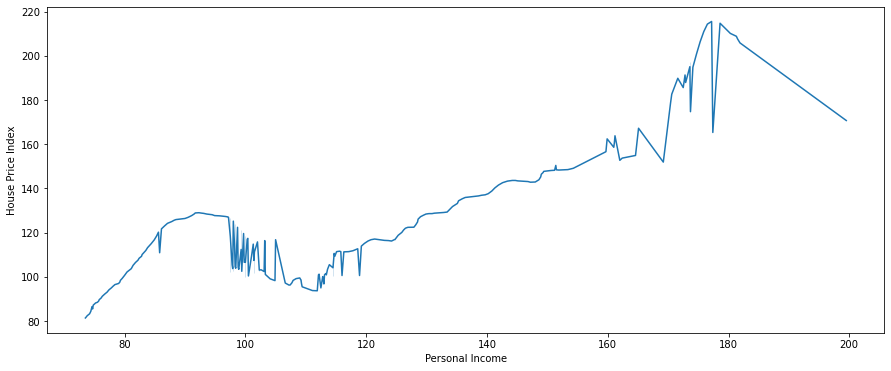

In [162]:
plt.figure(figsize=(15,6))
sns.lineplot(y="House Price Index",x="Personal Income",data=home_prices)

AS WE CAN SEE IN THE GRAPH CLEALRY THAT YEAR BY YEAR PERSONAL INCOME OF THE PERSON INCREASES THE HOUSE PRICE INDEX ALSO INCREASES WHICH IS KIND OF POSITIVE RELATIONSIP BETWEEN THE HOME PRICE AND AND PERSONAL INCOME
EXCEPT IN THE LAST PART WE CAN SEE PERSOBAL INCOME STUILL RISING BUT HOUSE PRICE FALL LITTILE BIT BUT MAYB IT IS DUE TO ANTOHER FACTOR BUT GENRALLY TH TREND FROM 2204 TO 2018 IS SHOWING THAT HOME PRICE IS INCREASED AS PERSONAL INCOME INCREASED

<AxesSubplot:xlabel='CPI', ylabel='House Price Index'>

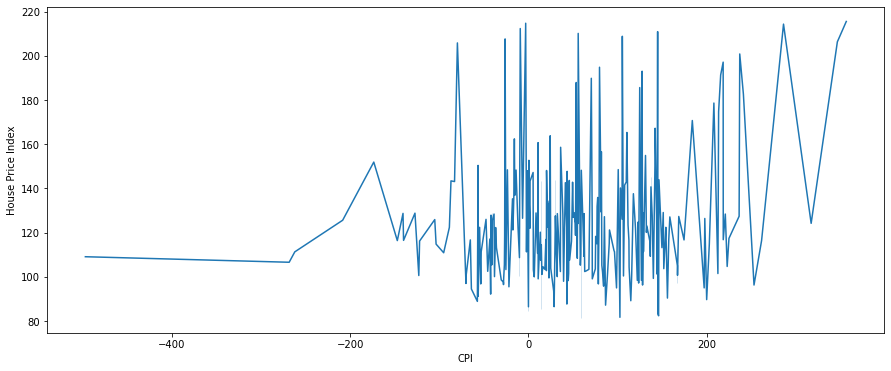

In [175]:
plt.figure(figsize=(15,6))
sns.lineplot(y="House Price Index",x="CPI",data=home_prices)

AS WE CAN SEEE THAT GEBERALLY CPI DON'T HAVE STRONG COORELATION WITH HOUSE PRICE BECAUSE AS WE CAN SEE INCREASES CPI IT INCREASED HOUSE PRICE ALSO BUT SOMWETIME DECREASES BECAUSE OF MANY FACTOR IN ONE OF THESE FACTOR COULD BE INFLATION RATE AS INFLATION RATE INCREAES RAW MATERIAL AND CONSTRUCTION COST IT AFFECT HOUSE ORICE WHERE AS LOW INFLAITION RATE ALSO LOWER HOSUE PRICE 

<Figure size 1080x432 with 0 Axes>

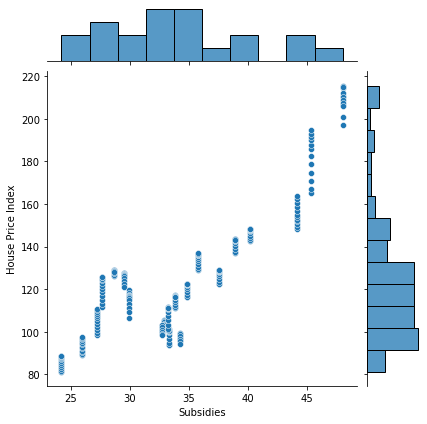

In [100]:
plt.figure(figsize=(15,6))
sns.jointplot(x="Subsidies",y="House Price Index",data=home_price)

THIS PLOT ALSO CLEALRY DEPICT THAT IF THE SUBSIIDIES INCREASES THE HOUSE PRICE ALSO INCREASES SURELY AMNY PERSON COULDN;T AFFOTRD HOME FOR THEM GOVERMENT LAUNCH MANY TYPES OF SCHEME WHICH FACILATE TO BUY HOUSE FOR LESS INCOME PEOPELE SO THEY COULD AFFORD BUT IN THAT WAY IT ALSO INCREASES THE PRICE FOR THE PEOPLE WHO ARE RICH FOR THEM THAT SAME HOUSE COULD COST HHGH BECAUSE RAW MATRIAL IS HIGH  

<AxesSubplot:xlabel='Personal Income', ylabel='House Price Index'>

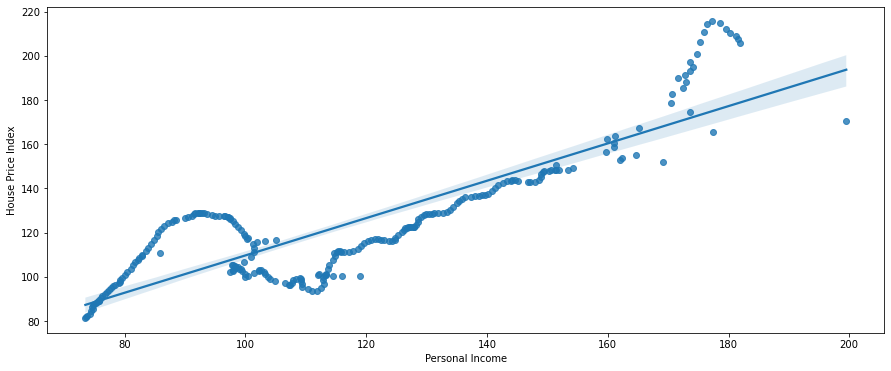

In [104]:
plt.figure(figsize=(15,6))
sns.regplot(x="Personal Income",y="House Price Index",data=home_price)

AS WE CAN CLEALYS EE THAT PERSONAL INCOME OF THE PERSON INCREASES THE ABILITY TO AFFORD THE HPUSE FOR THEM ALSO INCREASES WHICH DIREVTLY INCREASES THE HOUSE PRICE OF THE HOME THAT WY WE SEE A HIGHLY POSITIUVE COOORELATION BETWEEN THOSE TWO FEATURE 

<AxesSubplot:xlabel='Producer Price index for contruction', ylabel='House Price Index'>

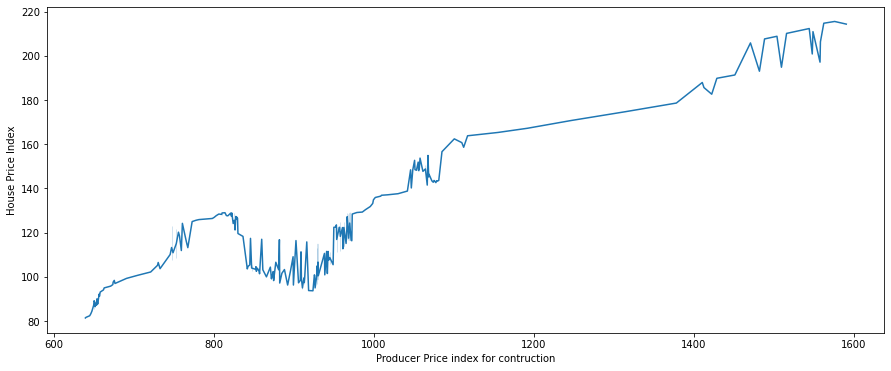

In [109]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Producer Price index for contruction",y="House Price Index",data=home_price)


AS USUAL THIS INDEX CAN CLEALRY TELL EVERYTHING WE CAN SEE PRODUCER PRICE INDEX IS INCREASING YEAR YEAR IN AME WAY HOUSE PRICE INDEX ALSO INCREASES BECAUSE THE COST OF RAW MATERIAL INCREASED IN THOSE YEAR SO PRODUCER ALSO INCREASED THE CONSTRUCTION PRICE WHICH DIRECTLY INCREASED THE HOUSE PRICE 
WHICH WE CAN CLEARYL SEE A HIGHLY POSITIVE COORELATION BETWEEN THOS TWO FEATURE 

<AxesSubplot:xlabel='Working Population age ', ylabel='House Price Index'>

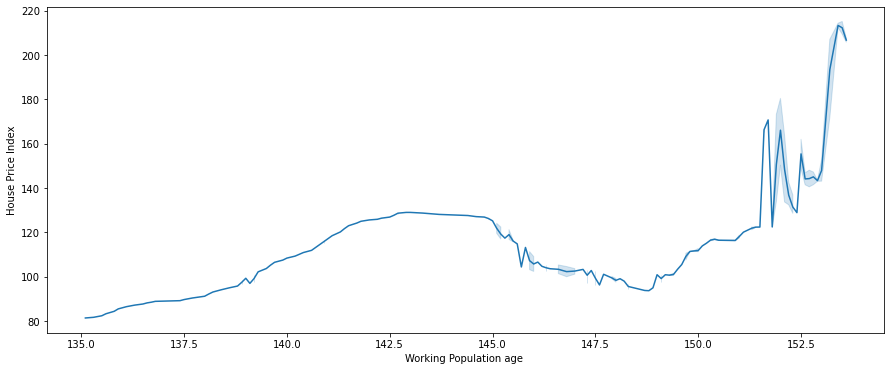

In [177]:
plt.figure(figsize=(15,6))
sns.lineplot(y="House Price Index",x="Working Population age ",data=home_prices)


AS WE CAN SEE THAT AS WORKING POPULATION AGE INCREASES THE HOUSE PRICE INDEX INCREASES AS WE CAN SEE IN LAST PART OF THE GRAPH WE CAN SEE THAT THERE IS SUDDEN JUMP IN THE HOUSE PRICE IT IS MANILY DUE TO INCRESE IN THE WORKINK POPULATION AND THERE INCREASES IN THE PERSONAL INCOME ALSO PERCAPITA INCOME WAS ALSO HIGH SO ALL THESE MAKE THE HOUSE PRICE ALSO INCREASES SUDDEN AND SMILIALY BETWEEN THW GRAPH WE HACVE SEEN THE THERE IS LITTILE RISE IN OUSE PRICE AS BECAUSE WOKING POPULATION WAS WORKING BUT MAYBE THERE SALARY WAS LESS 
BUT OVERALL IF WE SEEE IF WORKKNG POPULATION INCREASES THE HOUSE PRICE INCREASES 

<AxesSubplot:xlabel='Working contruction completed', ylabel='House Price Index'>

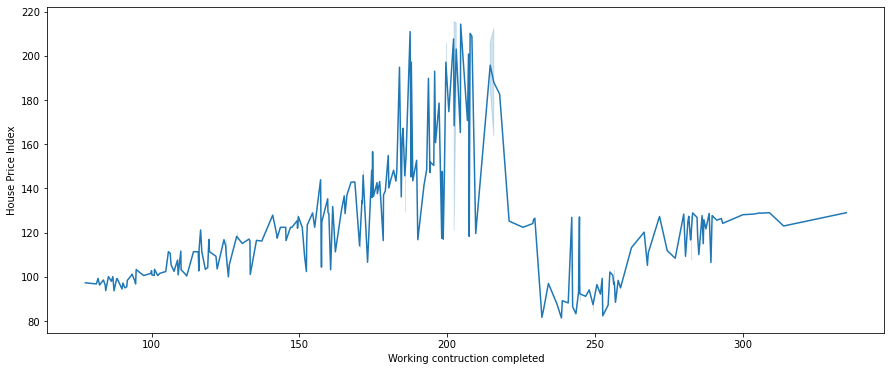

In [170]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Working contruction completed",y="House Price Index",data=home_prices)

AS WE CAN SEE THERE IS LITTILE BIT OF RISE AND THEN FALL WE CAN CLEALRY SEE THAT FOR FEW YEARS THE CONTRUCTION WORK FOR HOUSE COMPLETED THE HOUSE PRICE ALSO INCREASES MAYBE CONTRUCTION OF NEW DIFFERENT STYLE HOUSE ATTRACTS MANY PEOPLE SO THE PRODUCER OF TRHE NEW HOUSE MAY HAVE INCREASED THE HOUSE PRICE OF THE HOUSE AND WE CAN SEE THAT IN TREND ALSO HOUSE PRICE INCREASES THE WORKING CONSTRUCTION ALSO INCREASED BUT AFTER I THINK TWO YEARS the WOTKING CONTRSUCTION INCREASED NUT HOUSE PRICE DECREASED BUT AFTER THAT HOUSE PRICE IS INCREASING 

In [150]:
home_prices

CPI  Interest Rate  Unemployment rate  \
0     58.7           1.73                5.7   
1    102.6           1.74                5.7   
2    146.0           1.73                5.7   
3    145.1           1.75                5.9   
4      0.0           1.75                5.8   
..     ...            ...                ...   
247   -9.2           2.33                3.7   
248   55.8           2.56                3.5   
249  105.3           3.08                3.7   
250  -26.2           3.78                3.6   
251  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index        GDP  ...  Total Household   \
0                 81.4   132138.0  ...          109297.0   
1                 81.7   140168.0  ...          109297.0   
2                 82.4   140509.0  ...          109297.0   
3                 83.3   149394.0  ...          109297.0   
4                 84.4   144274.0  ...          109297.0   
..                 ...        ...  ...               ...   
247              212.3  6701519.0  ...          131202.0   
248              210.1  6546655.0  ...          131202.0   
249              208.8  6802375.0  ...          131202.0   
250              207.6  6920709.0  ...          131202.0   
251              205.8  6920709.0  ...          131202.0   

     Working contruction completed  Subsidies  Economy_policy_taxes  \
0                            238.7     24.183                172.93   
1                            232.1     24.183                 86.60   
2                            252.7     24.183                 82.61   
3                            243.6     24.183                 72.46   
4                            249.4     24.183                 76.25   
..                             ...        ...                   ...   
247                          215.8     48.021                103.00   
248                          207.8     48.021                 67.00   
249                          208.4     48.021                111.74   
250                          202.2     48.021                119.52   
251                          214.6     48.021                 95.10   

     Global_Economic_policy  Consumer_sentiment  Stock_market_Equity  \
0                    107.13                85.2                99.32   
1                     89.99                83.1                69.82   
2                     78.67   

<AxesSubplot:xlabel='House Price Index', ylabel='Consumer_sentiment'>

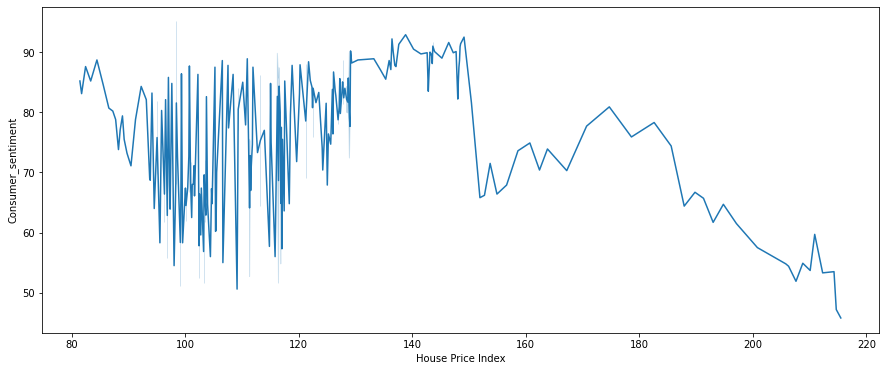

In [165]:
plt.figure(figsize=(15,6))
sns.lineplot(y="Consumer_sentiment",x="House Price Index",data=home_prices)

WE CAN SEE FROM THE GRPAH THAT SOMETIMES CONSUMER SENTIMENTS ARE HIGH PRICE IS HIGH AND SOMETIMES ARE LOW PRICE GET LOW BUT WE CAN ALSO SEE THAT IT IS INVERSE IN SOME CASES WHICH MEANS SOMETHING ALSO EFFECTING THE CONSUMER SENTIMENTS MAYE THERE INCOME OR ECONMIC CRISIS

<AxesSubplot:xlabel='New contructed House', ylabel='House Price Index'>

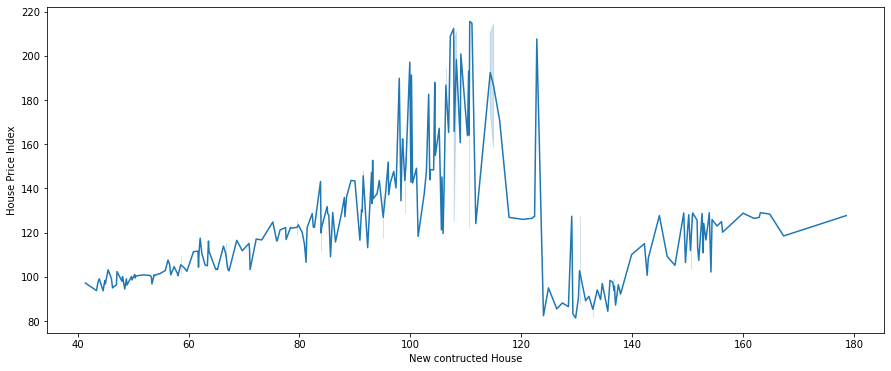

In [179]:
plt.figure(figsize=(15,6))
sns.lineplot(x="New contructed House",y="House Price Index",data=home_prices)

AS WE CAN SEE THERE IS POSTIVE COORELATION OF NEWCONTRSUCTED HOUSE INCREASES THE HOUSE PRICE ALSO INCREASES SUDDBELY ONLY FEW PLACE WHERE IT HAPPENS MAYBE DUE TO THE ECONMOY CRISIS DUE TO COVID PEPEL WERE NOT BUYING HOMES AS THERE INCOME AND SAVING WAS SOENDING ON HEALTH BUT AFTER THE RECOVERY OF PSOT COVID WE CAN CLEALRY SEE THAT THERE I AFAIN INCRASES IN THE HOUSE PRICE AS NEW CONSTRUCTED HOSUE INREASED 

<AxesSubplot:xlabel='Interest Rate', ylabel='House Price Index'>

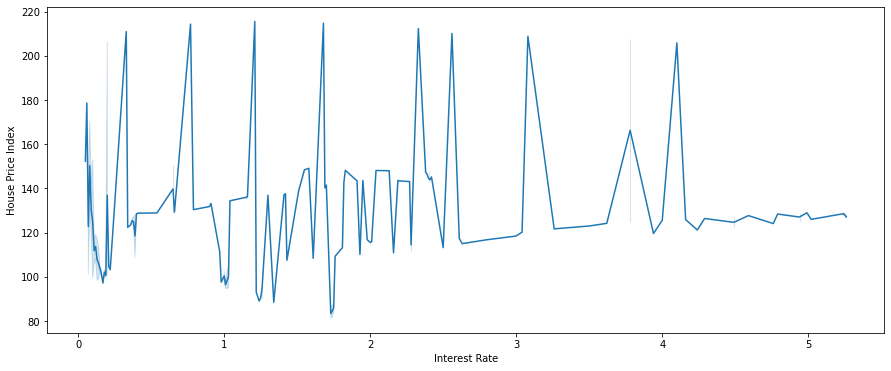

In [183]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Interest Rate",y="House Price Index",data=home_prices)

AS WE CAN SEE THAT THERE NO POSTIVE COORELATION OF INTERESRT RATE WITH HOUSE PRICE SOMETIMES HOUSE PIRCE ARE HIGH AND SOMETIMES IT IS LOW MAYBE ANOTHER FACTORS ALSO AFFECTING IT

<AxesSubplot:xlabel='Total Household ', ylabel='House Price Index'>

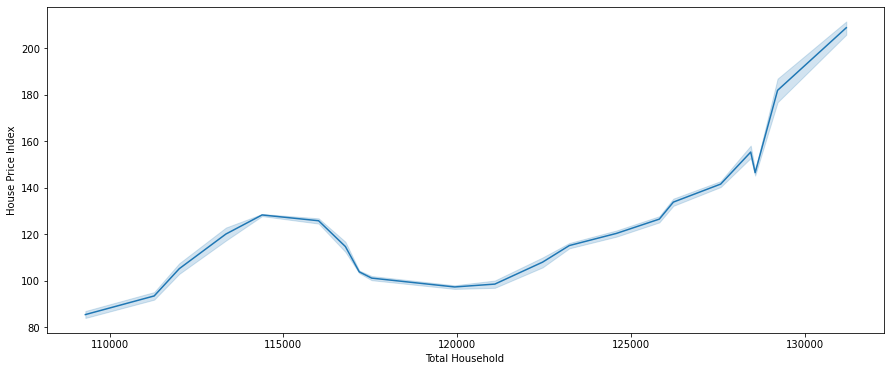

In [186]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Total Household ",y="House Price Index",data=home_prices)

AS WE CAN SEE CLEARLY FROM THE GRAPH THAT TOTAL HOUSE HOLD INCREASES THE RATE OF HOSUE PRICE ALSO INCREASES BUT I THINK AFTER A CRISIS HOUSE PRICE FELL LITTILE BUT AGAQIN AFTER THAT AS HOUSEHOLD INCREASES THAT PRICE OF HOUSE INCREASES AS USUAL PEOPEL START EARNING MORE BETTWER LIFESTYLE THEY NEED HOME RAW MATERIAL COST ARE HIGH ALL THESE THINGS INCREASES THE PRICE OF HOUSEHIOLD 
AS WE CAN CLEARY SEE POSTIVE COOREALTION BETWEEN THEM ALSO SUDDEN INCREASES IN THE HOUSE PRICE 

<AxesSubplot:xlabel='Personal_consume_Expenditure', ylabel='House Price Index'>

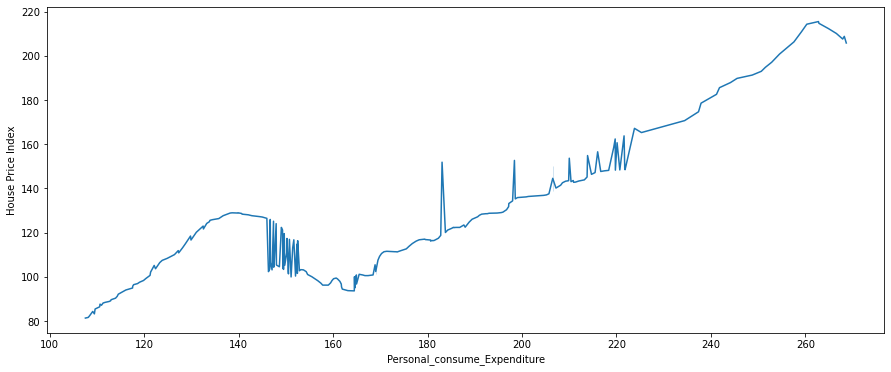

In [188]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Personal_consume_Expenditure",y="House Price Index",data=home_prices)

YES IT IS BIG HIGH POSITIVE COORALTION OF AS PERSONAL EXPEMDITURE INCREASES BY THE PERSON THE THE PRICE OF HOUSE PRICE ALSO ONCREASES AS PERSON ARE ABLE TO EXPEND MORE THE PRODUCER ALSO INCREASE THE PRICE BECAUSE PERSON ARE READY TO BUY AT WHATEVER COST ADN MAIN FACTIOR ALSO ECONOMY ALSO INCREASES AND PERSONAL AINCOME IS ALSO IGF FACTOR THAT WE CANSEE IN THE LAST PART OF GRAPG THE HOUSE PRICE SURGES SUDDNELY VERY HIGH AS PERSONAL EXPENDITURE INCREASES 

<AxesSubplot:xlabel='House Price Index', ylabel='Global_Economic_policy'>

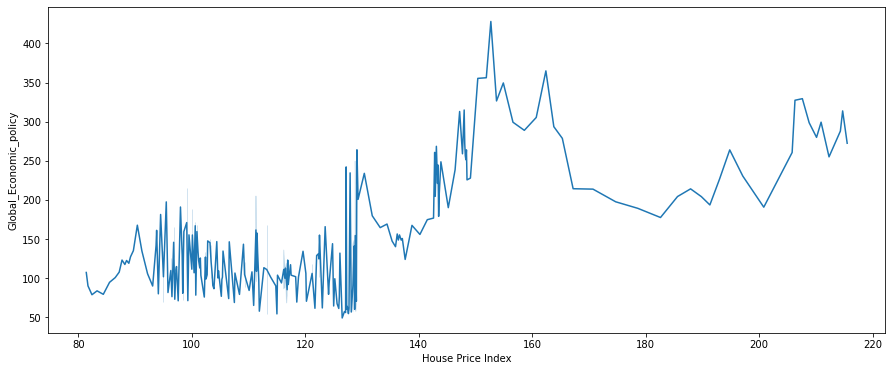

In [195]:
plt.figure(figsize=(15,6))
sns.lineplot(y="Global_Economic_policy",x="House Price Index",data=home_prices)

AS WE CAN SEE THAT AS GLOBAL ECONOMY INCREASES IT INCREASES DEMAD FRO MORE HOUES BECAUSE IT MAKE COUNTRY ECONOMY ALSO BOOST AND THEN PERSONAL INCOME SO PEOPEK WOULD TRY TO INVEST IN REAL ESTATE AND BUY THE HOSUE WHICH TENDS YO INCREASES THE HOSE PRICE RAPIDY IN THE LAT PART OF GRAPH 

<AxesSubplot:xlabel='House Price Index', ylabel='Economy_policy_taxes'>

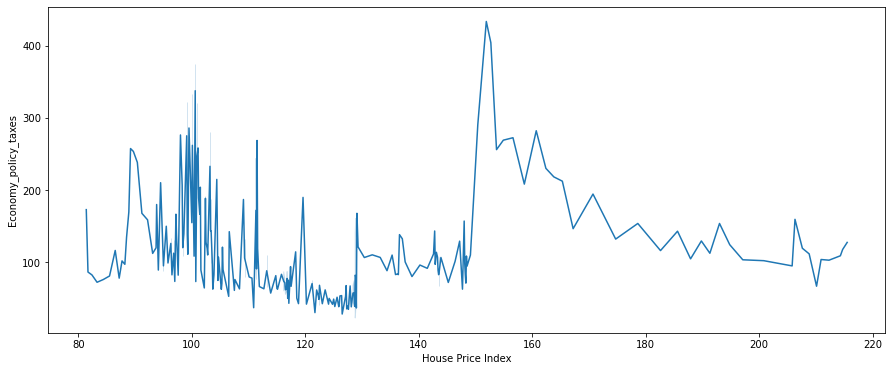

In [193]:
plt.figure(figsize=(15,6))
sns.lineplot(y="Economy_policy_taxes",x="House Price Index",data=home_prices)

THERE IS NEGATUVE COOREKATION BETWEEN THW HOUSE PRICE ANMD ECONOMY POLICY TAXES WE CAN SEE SOMETIMES IT INCREASED HOUSE PRICE DECREASESD AND SOMETIMES HOUSE PRICE INCFEASED

<AxesSubplot:xlabel='GDP', ylabel='House Price Index'>

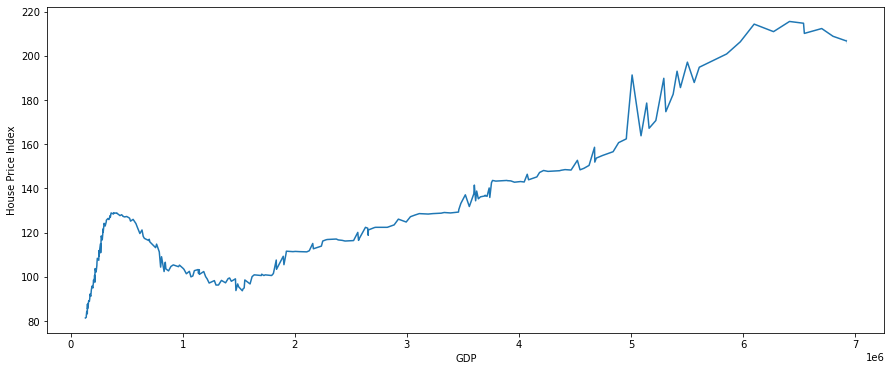

In [197]:
plt.figure(figsize=(15,6))
sns.lineplot(x="GDP",y="House Price Index",data=home_prices)

AS WE CAN CLEALRY SEE THAT IT IS HIGHLY POSITIVE COORELATION OF GDP AND HOUSE PRICE INDEDX AS GDP INCREASES IN GFENERAL IT BENFIT ALL BECAUSE IT INCREASES BUSINESS JOB AND IN GENERAL IT HELPS PEOPLE AND ECONOMY SO HOUSE PRICE ALSO TRY TO INCREASES AS WE CAN SEE HOUSE PRICE INCREASES SUDDEN AND RAPID AS GDP INCRESED 

<AxesSubplot:xlabel='Year', ylabel='House Price Index'>

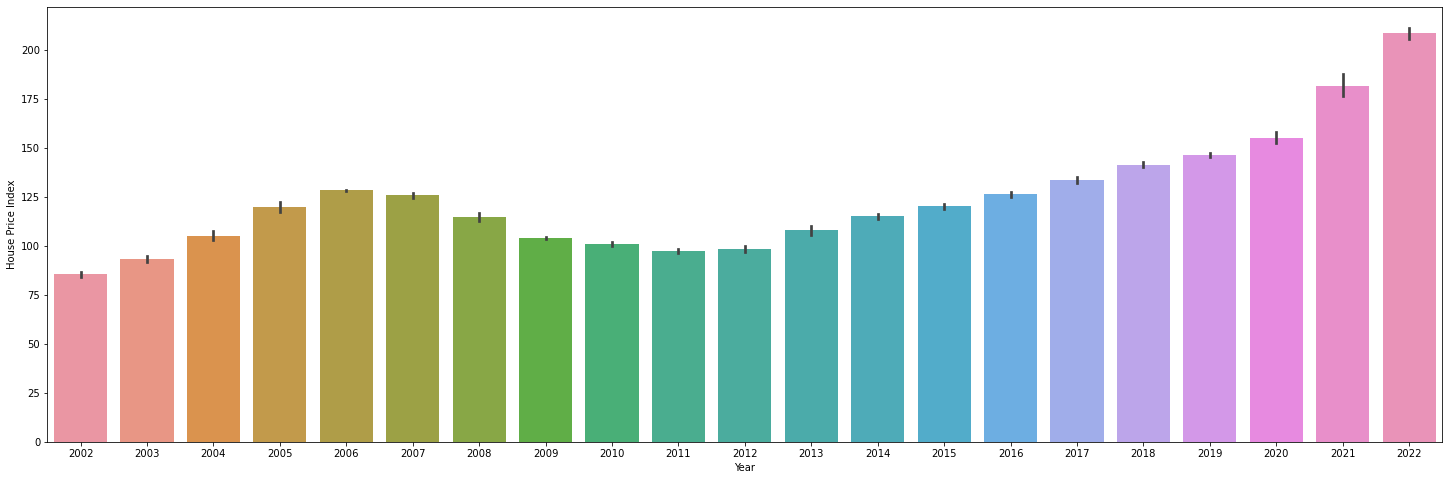

In [199]:
plt.figure(figsize=(25,8))
sns.barplot(x="Year",y="House Price Index",data=home_prices)

AS WE CAN CLAELRY SEE THAT HOW HOUSE PRICE INDEX AS INCREASED OVER THE PERIOD OF YEARS BETWEEN 2004 TO 2007 THE HOUSE PRICE INCREASED SUDDEN AND AFTER THAT DWON BECAUSE OF RECESSION AND AGAIN WHEN ECOMMY GET GOOD HOSUE PRICE INCREASED ALSO AND AFTER THAT IT START INCREASING TIULL 2022 IT AT PEAK LEVEL 

# MULTIVARIAYE ANALYSIS

<Figure size 2304x2160 with 0 Axes>

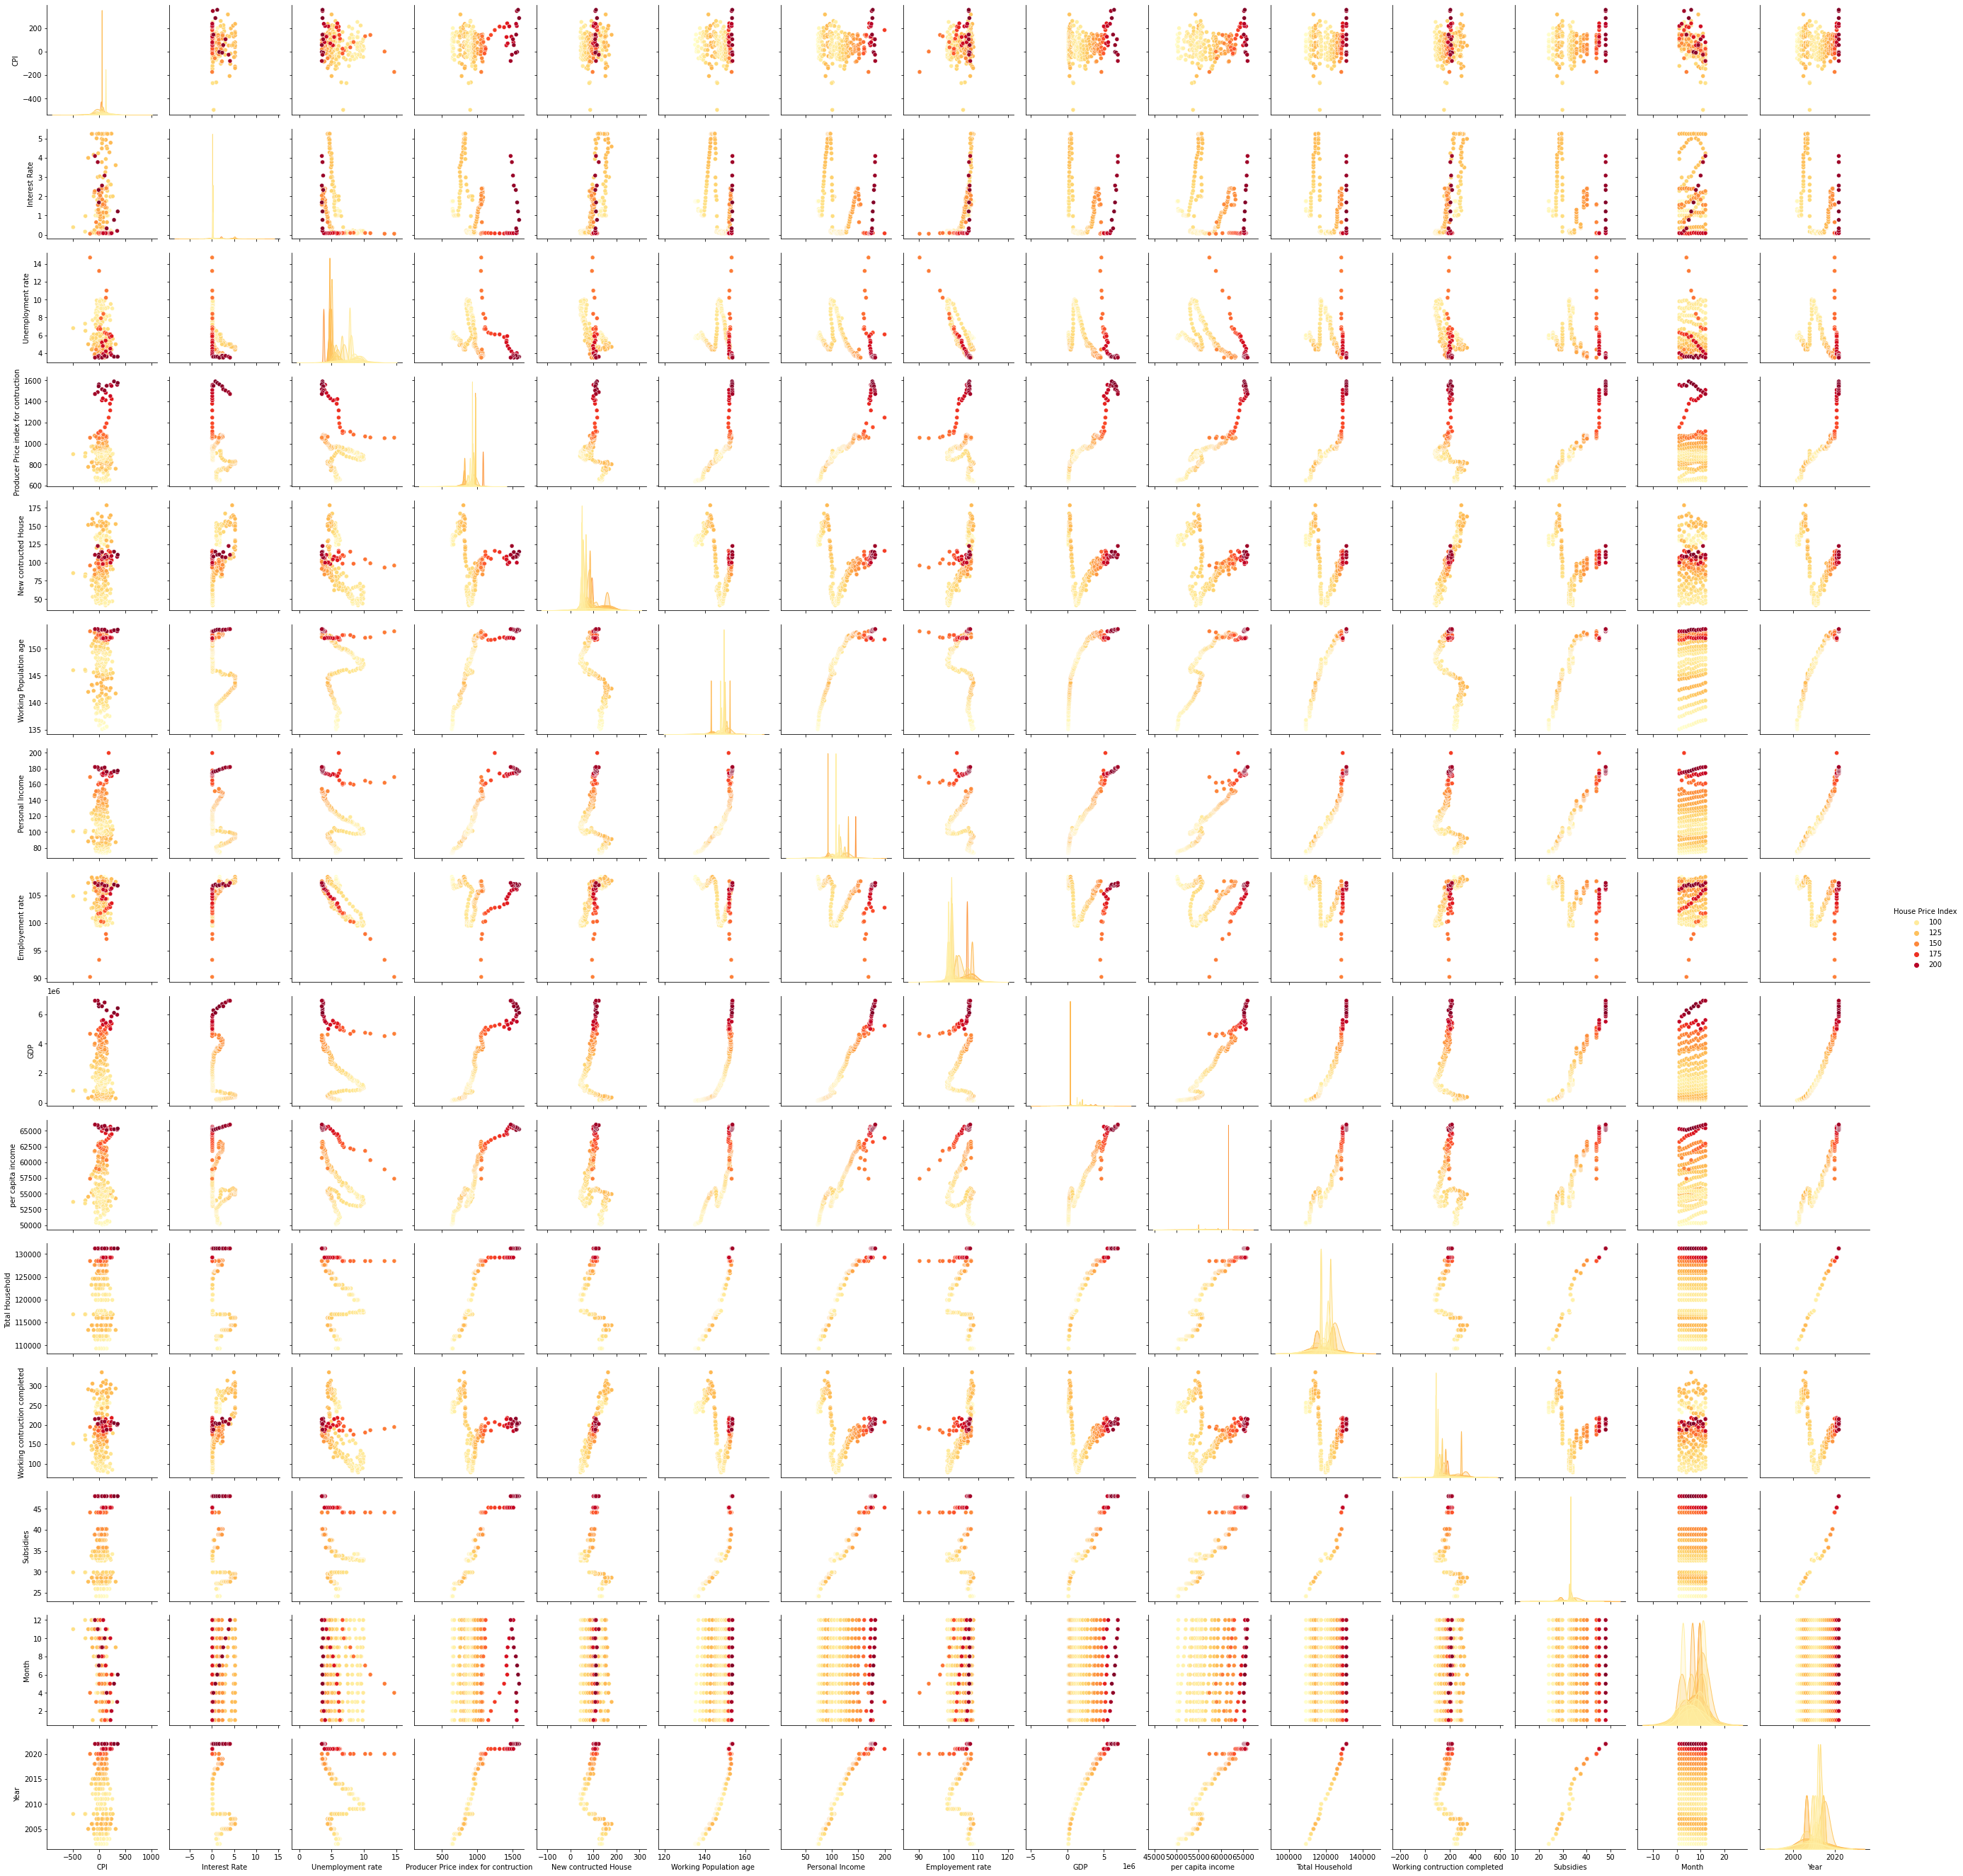

In [119]:
plt.figure(figsize=(32,30))
sns.pairplot(home_price,hue='House Price Index',palette='YlOrRd')
plt.show()

# LET'S DO SOME PRE PROCESSING

# OUTLIERS

In [27]:
home_prices

Date    CPI  Interest Rate  Unemployment rate  \
0   2002-01-01   58.7           1.73                5.7   
1   2002-01-02  102.6           1.74                5.7   
2   2002-01-03  146.0           1.73                5.7   
3   2002-01-04  145.1           1.75                5.9   
4   2002-01-05    0.0           1.75                5.8   
..         ...    ...            ...                ...   
247 2022-01-08   -9.2           2.33                3.7   
248 2022-01-09   55.8           2.56                3.5   
249 2022-01-10  105.3           3.08                3.7   
250 2022-01-11  -26.2           3.78                3.6   
251 2022-01-12  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index  ...  Total Household   Working contruction completed  \
0                 81.4  ...          109297.0                          238.7   
1                 81.7  ...          109297.0                          232.1   
2                 82.4  ...          109297.0                          252.7   
3                 83.3  ...          109297.0                          243.6   
4                 84.4  ...          109297.0                          249.4   
..                 ...  ...               ...                            ...   
247              212.3  ...          131202.0                          215.8   
248              210.1  ...          131202.0                          207.8   
249              208.8  ...          131202.0                          208.4   
250              207.6  ...          131202.0                          202.2   
251              205.8  ...          131202.0                          214.6   

     Subsidies  Economy_policy_taxes  Global_Economic_policy  \
0       24.183                172.93                  107.13   
1       24.183                 86.60                   89.99   
2       24.183                 82.61                   78.67   
3       24.183                 72.46                   83.63   
4       24.183                 76.25                   79.20   
..         ...                   ...                     ...   
247     48.021                103.00                  254.98   
248     48.021                 67.00                  279.90   
249     48.021                111.74                  298.58   
250     48.021                119.52                  329.37   
251     48.021            

In [28]:
#LET'S DROP THE DATE COLUMN 
home_prices.drop('Date',axis=1, inplace=True)

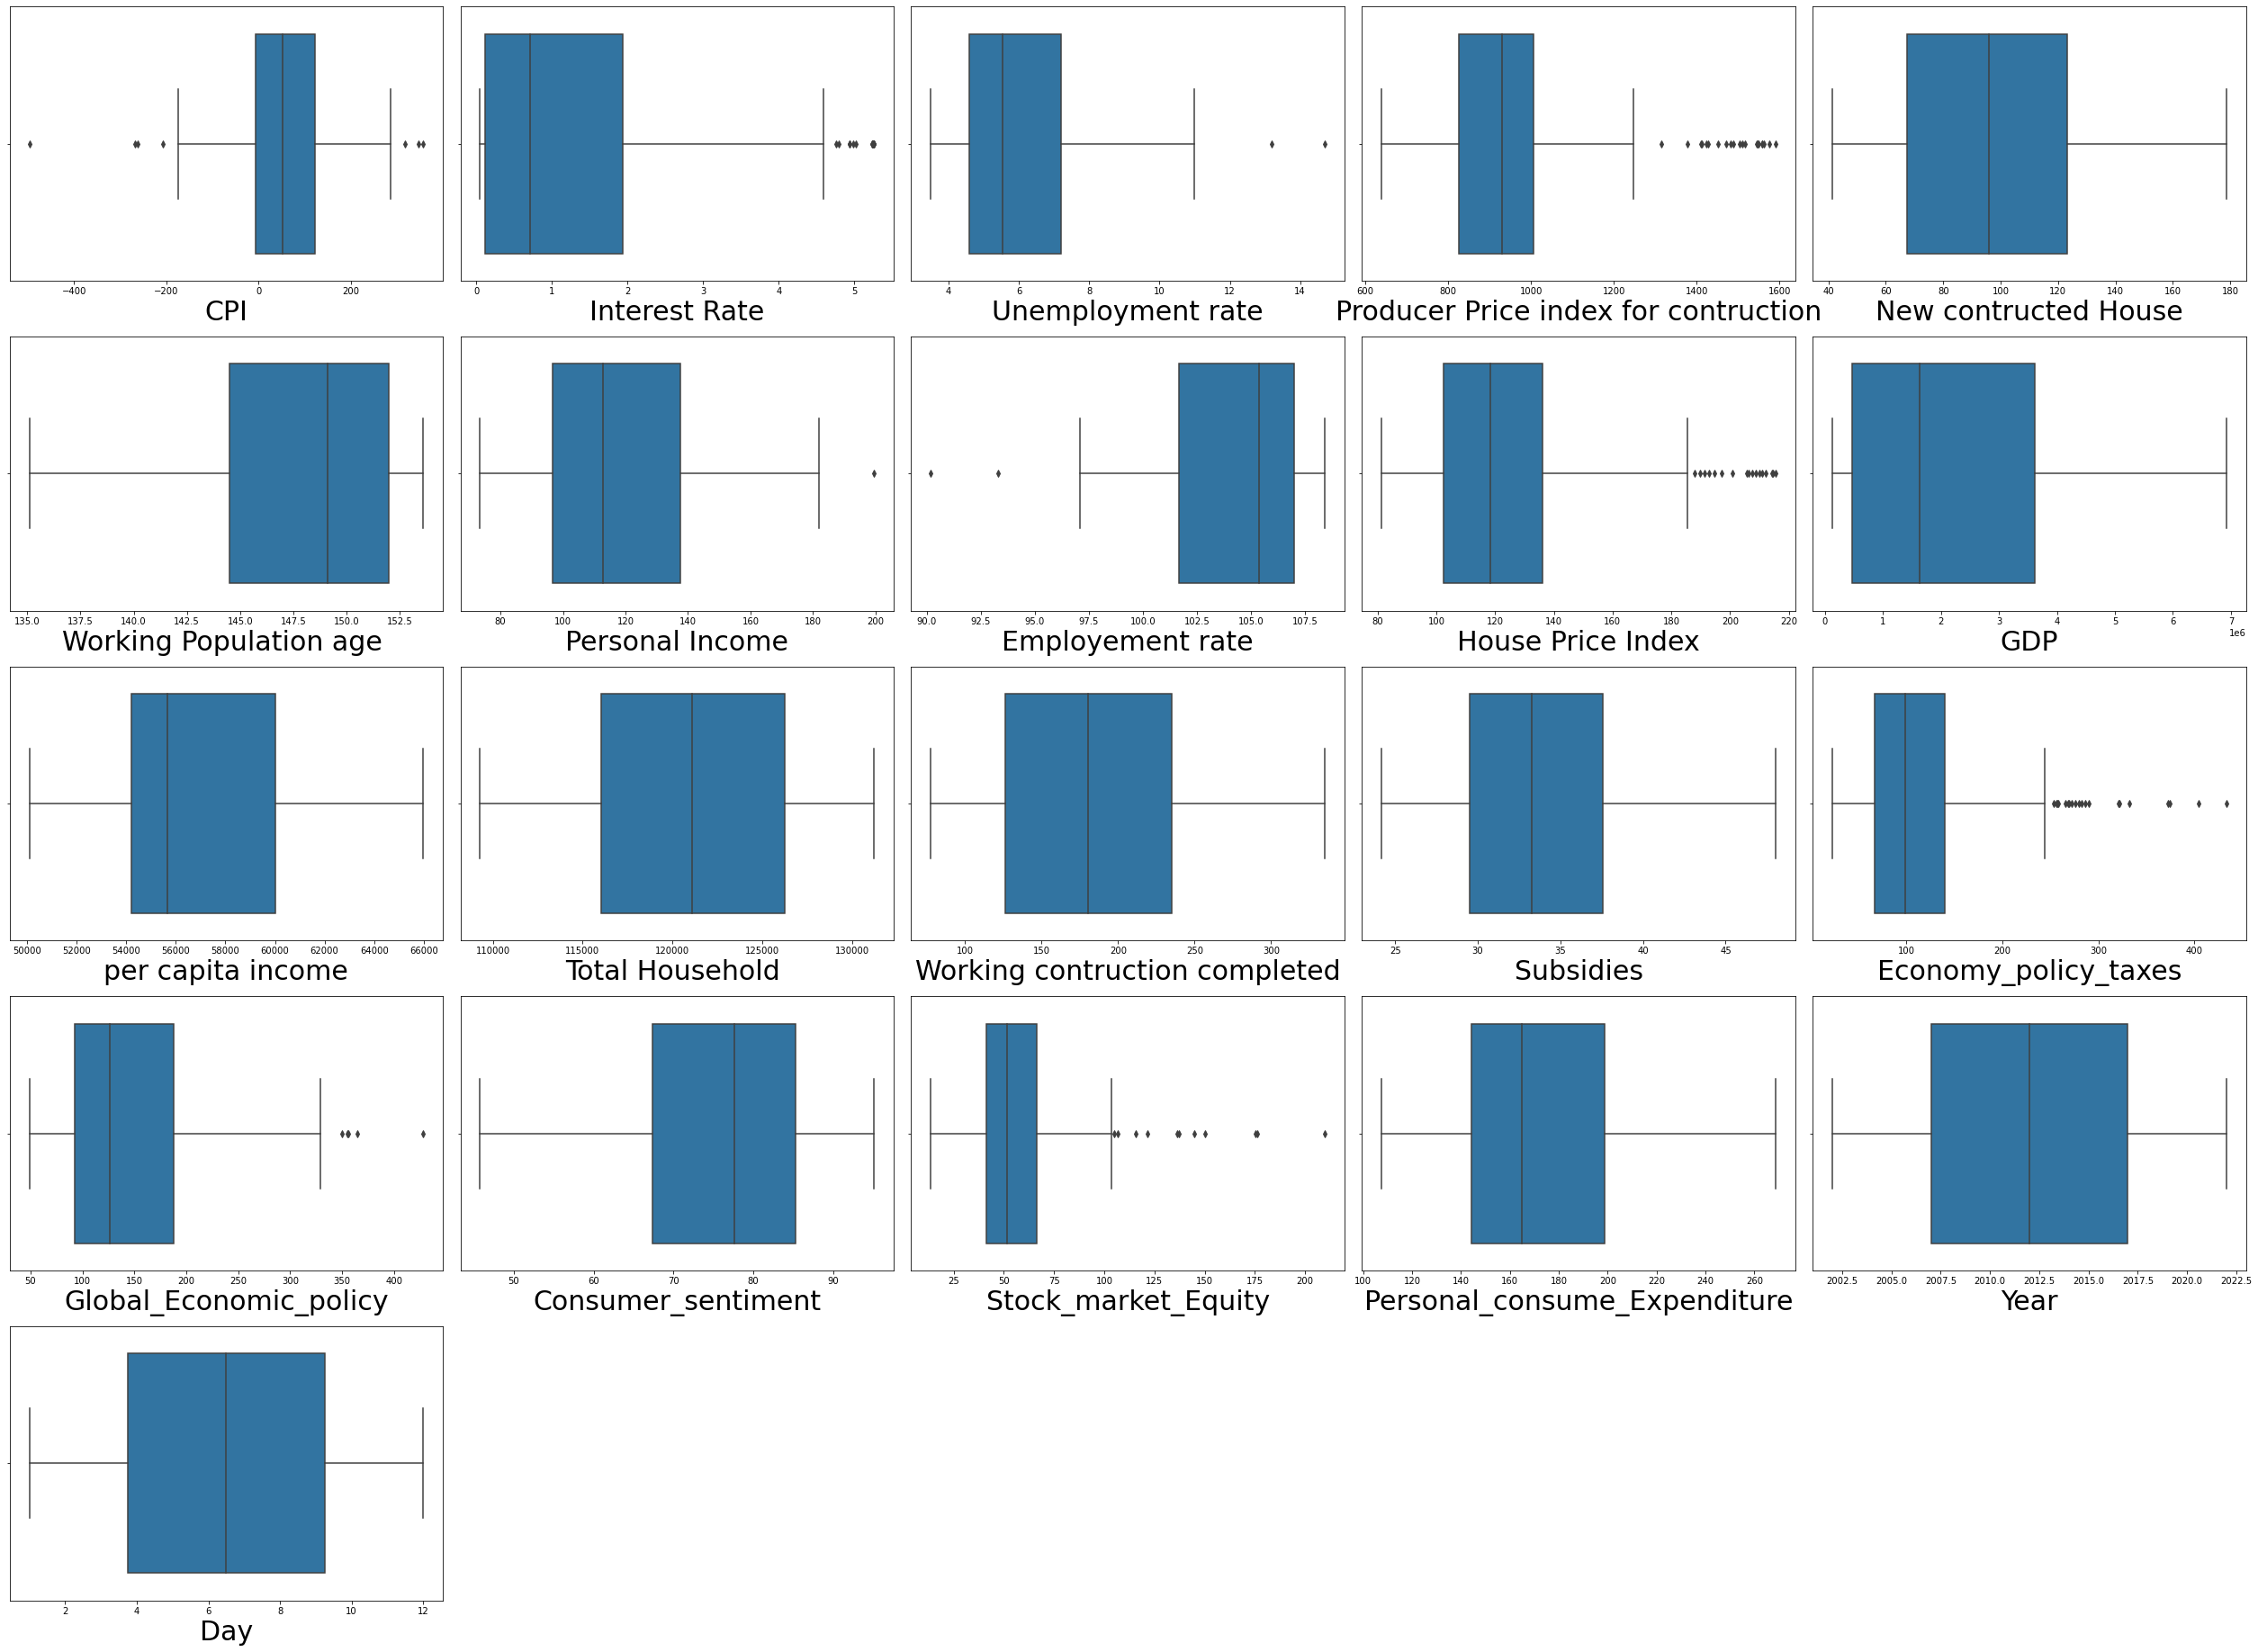

In [29]:
plt.figure(figsize=(35,30),facecolor='white')
plotnumber=1
for column in home_prices.columns:
    if plotnumber<=25:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(home_prices[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.tight_layout()

In [30]:
home_prices.columns

Index(['CPI', 'Interest Rate', 'Unemployment rate',
       'Producer Price index for contruction', 'New contructed House',
       'Working Population age ', 'Personal Income', 'Employement rate',
       'House Price Index', 'GDP', 'per capita income', 'Total Household ',
       'Working contruction completed', 'Subsidies', 'Economy_policy_taxes',
       'Global_Economic_policy', 'Consumer_sentiment', 'Stock_market_Equity',
       'Personal_consume_Expenditure', 'Year', 'Day'],
      dtype='object')

AS WE CAN SEE THAT FEW COLUMN LIKE 'PRODUCER PRICE INDEX FOR CONSTRUCTION', 'INTEREST RATE', 'CPI', 'UNEMPLOYEMENT RATE', 'HOUSE PRICE INDEX', AND 'EMPLOYEMENT RATE' ALL THIS CONTAIN OUTLIERS AS WE CAN SEE BY BOXPLOT SO WE HAVE TO REMOVE THAT USING 'Z- SCORE'

# Z-SCORE REMOVE OUTLIERS

In [31]:
# NOW WE USE Z - SCORE TO REMOVE OUTLIERS OTHERWISE IT AFFECT OUR MODEL ACCURACY
from scipy.stats import zscore
features = home_prices[['CPI','Interest Rate','Unemployment rate','Producer Price index for contruction','House Price Index','Economy_policy_taxes','Global_Economic_policy','Stock_market_Equity']]
z=np.abs(zscore(features))

In [32]:
z

CPI  Interest Rate  Unemployment rate  \
0    0.048804       0.266936           0.151988   
1    0.474092       0.273430           0.151988   
2    0.894537       0.266936           0.151988   
3    0.885818       0.279925           0.051063   
4    0.519863       0.279925           0.101526   
..        ...            ...                ...   
247  0.608989       0.656630           1.161237   
248  0.020709       0.806013           1.262162   
249  0.500249       1.143748           1.161237   
250  0.773680       1.598392           1.211699   
251  1.291970       1.806229           1.262162   

     Producer Price index for contruction  House Price Index  \
0                                1.475245           1.458325   
1                                1.470883           1.448138   
2                                1.449077           1.424369   
3                                1.442292           1.393808   
4                                1.435993           1.356457   
..                                    ...                ...   
247                              2.906945           2.986544   
248                              2.769805           2.911840   
249                              2.711654           2.867697   
250                              2.636541           2.826949   
251                              2.551253           2.765828   

     Economy_policy_taxes  Global_Economic_policy  Stock_market_Equity  
0                0.765626                0.536556             1.595451  
1                0.406925                0.764389             0.466391  
2                0.461118                0.914860             0.542491  
3                0.598978                0.848929             0.045322  
4                0.547501                0.907815             0.574640  
..                    ...                     ...                  ...  
247              0.184177                1.428733             0.681805  
248              0.673136                1.759981             1.682650  
249              0.065469                2.008284             0.106240  
250              0.040201                2.417559             0.389398  
251              0.291477                1.503038             0.096608  

[252 rows x 8 columns]

AS WE CAN SEE WE APPLY OUR  Z SCORE ON OUR FEATURE SO IT REDUCE THE VALUE WITHIN THE THE RANGE -3 TO 3 SO NOW WE CAN APPLY < 3 RANGE TO SAGGERATE THE VALUES WHICH CONTAIN OUTLIUERS 

In [33]:
# let's create new daaframe wihtout outliers clean data
home_prices_new = home_prices[(z<3).all(axis=1)] 
home_prices_new

CPI  Interest Rate  Unemployment rate  \
0     58.7           1.73                5.7   
1    102.6           1.74                5.7   
2    146.0           1.73                5.7   
3    145.1           1.75                5.9   
4      0.0           1.75                5.8   
..     ...            ...                ...   
247   -9.2           2.33                3.7   
248   55.8           2.56                3.5   
249  105.3           3.08                3.7   
250  -26.2           3.78                3.6   
251  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index        GDP  ...  Total Household   \
0                 81.4   132138.0  ...          109297.0   
1                 81.7   140168.0  ...          109297.0   
2                 82.4   140509.0  ...          109297.0   
3                 83.3   149394.0  ...          109297.0   
4                 84.4   144274.0  ...          109297.0   
..                 ...        ...  ...               ...   
247              212.3  6701519.0  ...          131202.0   
248              210.1  6546655.0  ...          131202.0   
249              208.8  6802375.0  ...          131202.0   
250              207.6  6920709.0  ...          131202.0   
251              205.8  6920709.0  ...          131202.0   

     Working contruction completed  Subsidies  Economy_policy_taxes  \
0                            238.7     24.183                172.93   
1                            232.1     24.183                 86.60   
2                            252.7     24.183                 82.61   
3                            243.6     24.183                 72.46   
4                            249.4     24.183                 76.25   
..                             ...        ...                   ...   
247                          215.8     48.021                103.00   
248                          207.8     48.021                 67.00   
249                          208.4     48.021                111.74   
250                          202.2     48.021                119.52   
251                          214.6     48.021                 95.10   

     Global_Economic_policy  Consumer_sentiment  Stock_market_Equity  \
0                    107.13                85.2                99.32   
1                     89.99                83.1                69.82   
2                     78.67   

AS YOU CAN CLEALRY SEE OUR NEW DATAFRAEM HOME_PRICES_NEW CONTAIN THE 236 ROWS ORIGINALL IT HAD 252 ROWS INM TOTAL NOW 236 16 COLUMN ARE REMOVED SO WE CAM TO CONCLUSION THATV 16 ROWS CONTAIN OUTLIERS AND WE HVAE REMOVED THE OUTLIERS AND OUR DATASTE IF FREE FROM OULTIERS 

In [34]:
home_prices_new

CPI  Interest Rate  Unemployment rate  \
0     58.7           1.73                5.7   
1    102.6           1.74                5.7   
2    146.0           1.73                5.7   
3    145.1           1.75                5.9   
4      0.0           1.75                5.8   
..     ...            ...                ...   
247   -9.2           2.33                3.7   
248   55.8           2.56                3.5   
249  105.3           3.08                3.7   
250  -26.2           3.78                3.6   
251  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate  \
0                      135.1             73.5             108.0   
1                      135.3             73.6             108.4   
2                      135.5             73.8             108.1   
3                      135.6             74.2             107.8   
4                      135.8             74.4             108.0   
..                       ...              ...               ...   
247                    153.4            179.5             107.1   
248                    153.5            180.3             107.1   
249                    153.5            181.3             106.8   
250                    153.6            181.5             106.9   
251                    153.6            181.9             107.3   

     House Price Index        GDP  ...  Total Household   \
0                 81.4   132138.0  ...          109297.0   
1                 81.7   140168.0  ...          109297.0   
2                 82.4   140509.0  ...          109297.0   
3                 83.3   149394.0  ...          109297.0   
4                 84.4   144274.0  ...          109297.0   
..                 ...        ...  ...               ...   
247              212.3  6701519.0  ...          131202.0   
248              210.1  6546655.0  ...          131202.0   
249              208.8  6802375.0  ...          131202.0   
250              207.6  6920709.0  ...          131202.0   
251              205.8  6920709.0  ...          131202.0   

     Working contruction completed  Subsidies  Economy_policy_taxes  \
0                            238.7     24.183                172.93   
1                            232.1     24.183                 86.60   
2                            252.7     24.183                 82.61   
3                            243.6     24.183                 72.46   
4                            249.4     24.183                 76.25   
..                             ...        ...                   ...   
247                          215.8     48.021                103.00   
248                          207.8     48.021                 67.00   
249                          208.4     48.021                111.74   
250                          202.2     48.021                119.52   
251                          214.6     48.021                 95.10   

     Global_Economic_policy  Consumer_sentiment  Stock_market_Equity  \
0                    107.13                85.2                99.32   
1                     89.99                83.1                69.82   
2                     78.67   

# SKWENESS

NOW WE HAVE TO CHECK THE SKENESS OF OUR DATASET BECAUSE IN STATISTICAL OVERVIEW IN THE SECOND POINT WE HVAE SEEN THAT OUR DATASET IS RIGHT SKWEED SO WE HVAE TO CONFIEM IT BY VALIDATING 

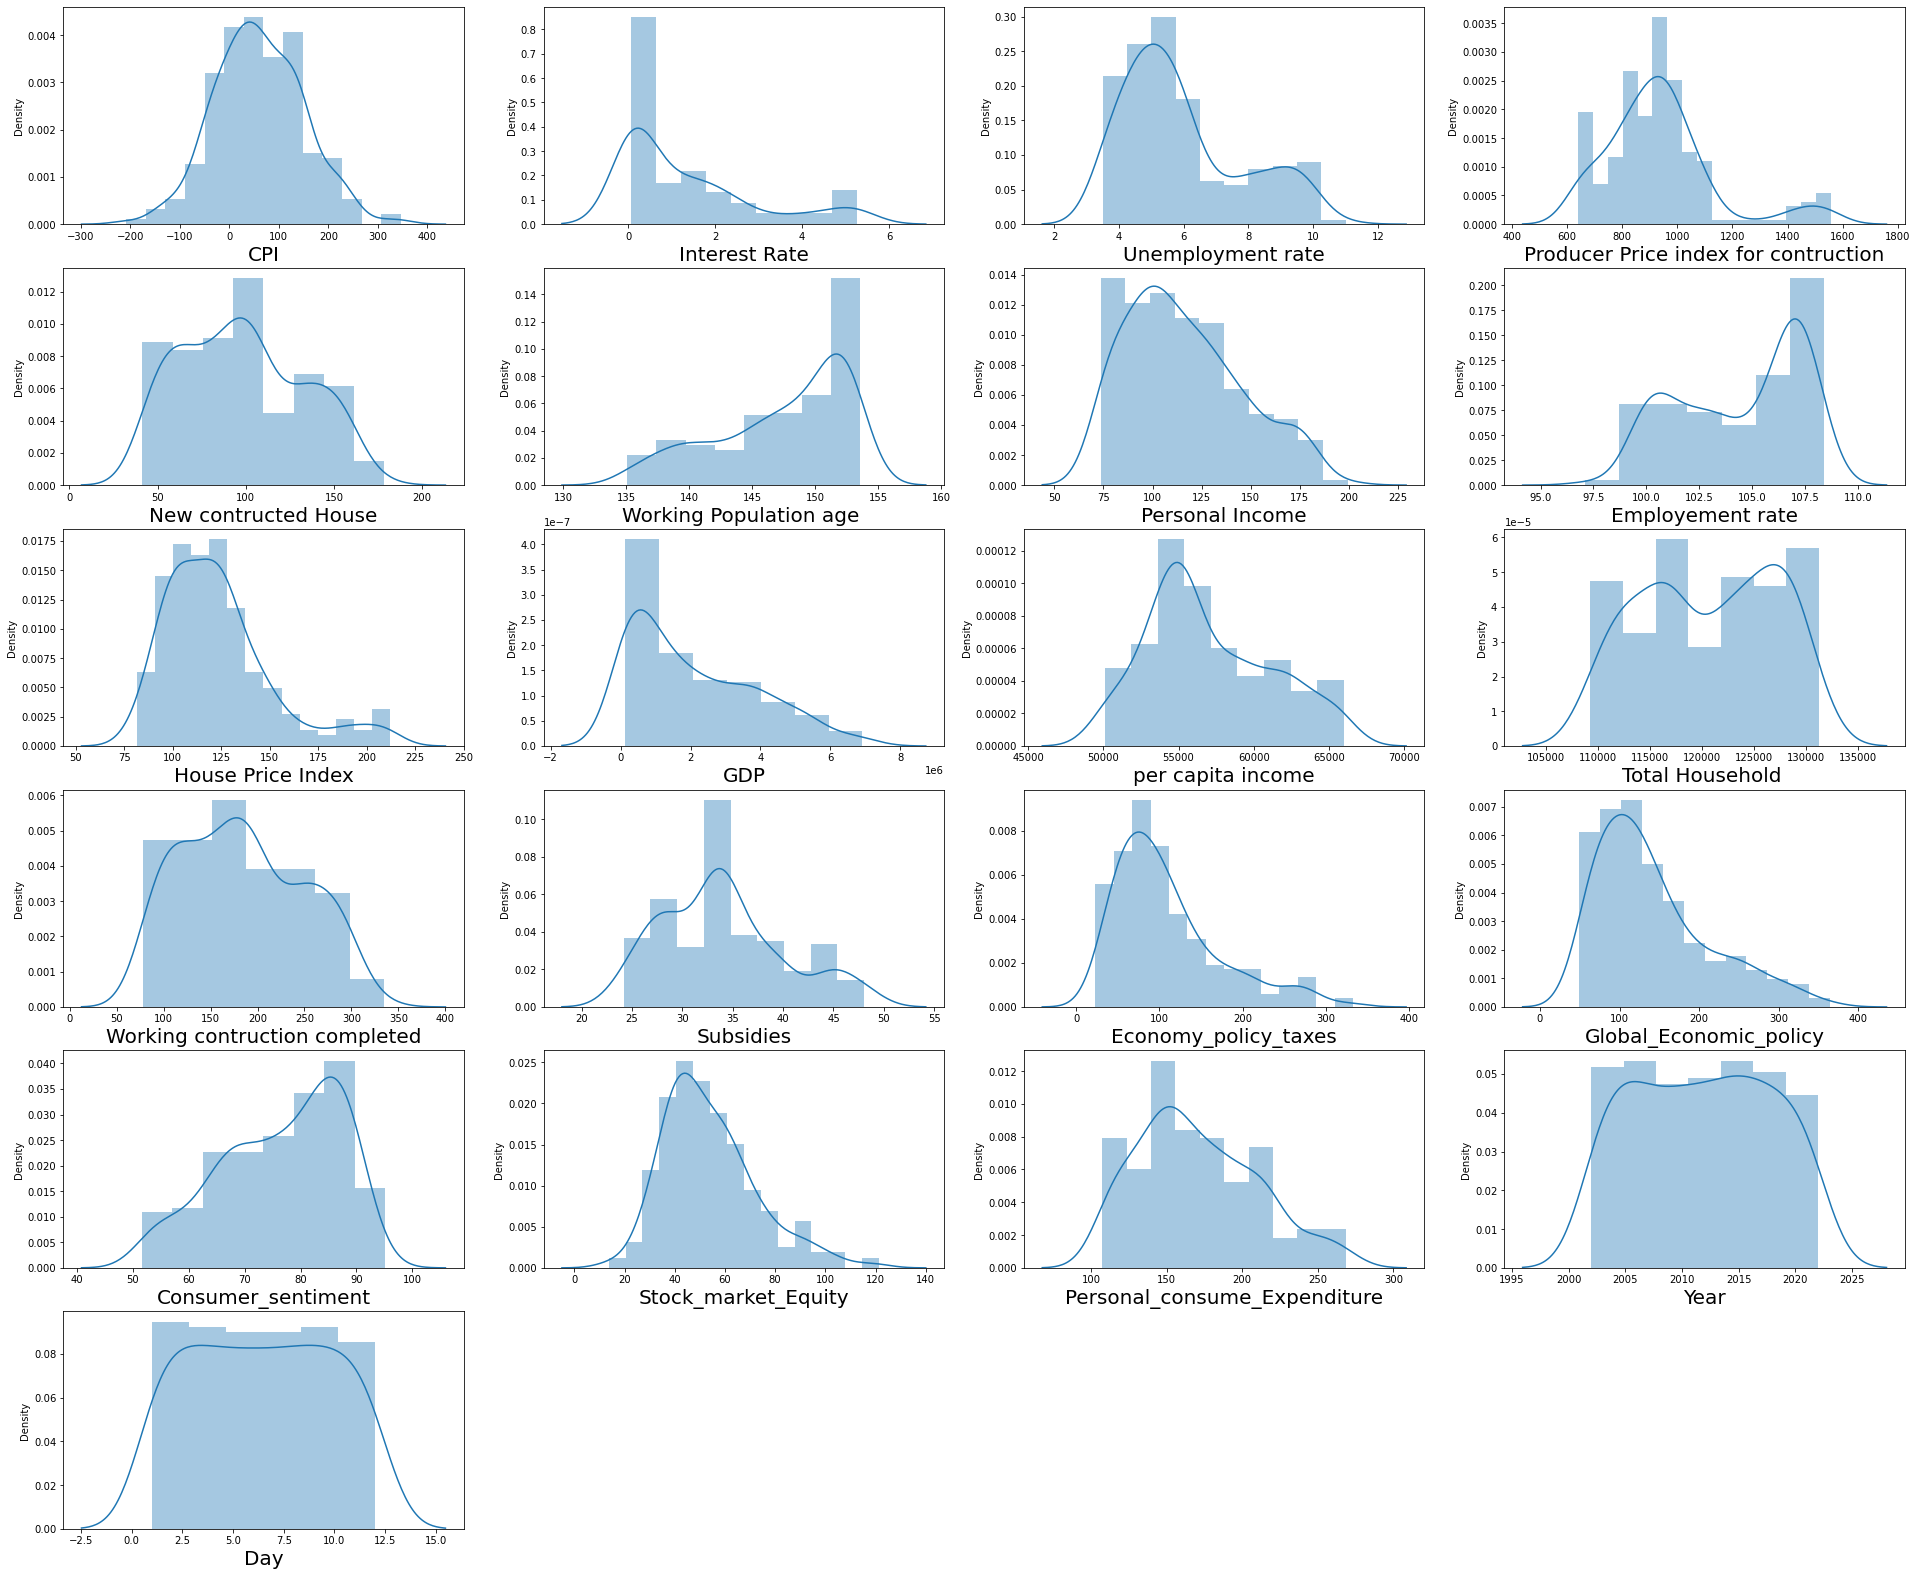

In [35]:
# LET'S CHECK SKWENESS USING DISTPLOT
plt.figure(figsize=(33,28))
plotnumber=1
for column in home_prices_new.columns:
    if plotnumber<=25:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(home_prices_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

AS WE CAN SEE DATA DISTRIBUTED ALMOST NORMALL FOLLOWS BELL SHAPED CURVED IN EVERY FEATURES BUT FEW FEATURE COULD LOOK SKEWED LIKE 'CONSUMER SENTIMENT', 'PRODUCER PRICE INDEXFOR CONSTRUCTION', 'INTERESR RATE','ECONOMY POLICY INDEX','GLOAL ECONOMY POLICY', 'WORKING POPULATION AGE ' AS ALL THIS SEEMS TO BE LOOK LITTLE BIT SKWEED IN DISTPLOT BUT WE ARE STILL NOT CERATIN SO WE HAVE TO CHEKC THE SKEWNESS USING SKEW METHOD 

In [36]:
# LET'S CHEKC THE SKWENESS OF OUR DATASET 
home_prices_new.skew()

CPI                                     0.143871
Interest Rate                           1.269304
Unemployment rate                       0.814222
Producer Price index for contruction    1.267401
New contructed House                    0.232916
Working Population age                 -0.750445
Personal Income                         0.572711
Employement rate                       -0.400928
House Price Index                       1.282689
GDP                                     0.755479
per capita income                       0.477501
Total Household                        -0.095016
Working contruction completed           0.231255
Subsidies                               0.565577
Economy_policy_taxes                    1.259059
Global_Economic_policy                  1.021216
Consumer_sentiment                     -0.497133
Stock_market_Equity                     0.889573
Personal_consume_Expenditure            0.488035
Year                                    0.009981
Day                 

AS WE CAN SEE FROM THE DATA OUR DATASER IS NOT SKEWED ALL THE VALUES OR SKENESS LIE BETWEEN -1 TO +1 WHICH MEANS OUR DATASET IS NORMALL DISTRIBUTED SO WE CAN MOVE AHEAD AND CHECK THE COORELATION

# NOW WE HAVE TO CHEK THE CORRELATION BETWEEN THE VARIOUS FEATURES AND LABEL SO WE HAVE TO USE HEAT MAP 

# HEAT MAP

In [37]:
corr=home_prices_new.corr()

In [38]:
corr

CPI  Interest Rate  \
CPI                                   1.000000       0.015778   
Interest Rate                         0.015778       1.000000   
Unemployment rate                    -0.033132      -0.527140   
Producer Price index for contruction  0.138127      -0.238477   
New contructed House                  0.081833       0.680567   
Working Population age               -0.033215      -0.363276   
Personal Income                       0.081785      -0.277028   
Employement rate                      0.083718       0.741225   
House Price Index                     0.151855       0.124134   
GDP                                   0.051670      -0.292297   
per capita income                     0.073941      -0.115811   
Total Household                       0.034612      -0.349021   
Working contruction completed         0.112488       0.726675   
Subsidies                             0.107310      -0.326891   
Economy_policy_taxes                  0.057007      -0.457448   
Global_Economic_policy                0.014359      -0.308960   
Consumer_sentiment                   -0.145579       0.209524   
Stock_market_Equity                  -0.024824      -0.064308   
Personal_consume_Expenditure          0.064959      -0.257787   
Year                                  0.046349      -0.366513   
Day                                  -0.549466       0.041226   

                                      Unemployment rate  \
CPI                                           -0.033132   
Interest Rate                                 -0.527140   
Unemployment rate                              1.000000   
Producer Price index for contruction          -0.250385   
New contructed House                          -0.586406   
Working Population age                        -0.105894   
Personal Income                               -0.278639   
Employement rate                              -0.825528   
House Price Index                             -0.521599   
GDP                                           -0.323193   
per capita income                             -0.446068   
Total Household                               -0.240224   
Working contruction completed                 -0.576564   
Subsidies                                     -0.165407   
Economy_policy_taxes                           0.502092   
Global_Economic_policy                        -0.145730   
Consumer_sentiment                            -0.537282   
Stock_market_Equity                            0.128033   
Personal_consume_Expenditure                  -0.307716   
Year                                          -0.213599   
Day                                           -0.034721   

                                      Producer Price index for contruction  \
CPI                                                               0.138127   
Interest Rate                                                    -0.238477   
Unemployment rate                                                -0.250385   
Producer Price index for contruction                              1.000000   
New contructed House                                             -0.247534   
Working Population age                                            0.800466   
Personal Income                                                   0.940563   
Employement rate                                                 -0.141775   
House Price Index                                                 0.888754   
GDP                                                               0.926059   
per capita income                                                 0.922252   
Total Household                                                   0.880224   
Working contruction completed                                    -0.263189   
Subsidies                                                         0.943080   
Economy_policy_taxes                                              0.135045   
Global_Economic_policy                                           

AS PU CAN SEE WE CRAETED MATRIX OF 21 X 21 TO SEE THE RELATIONSHIP BETWEEN VARIOUS FEATURE AND LABEL AND COORELATION OF EACH FEATURE WITH POTHER FEATURE AND NOW WE ALSO VISULAIZE USING HEAT MAP 

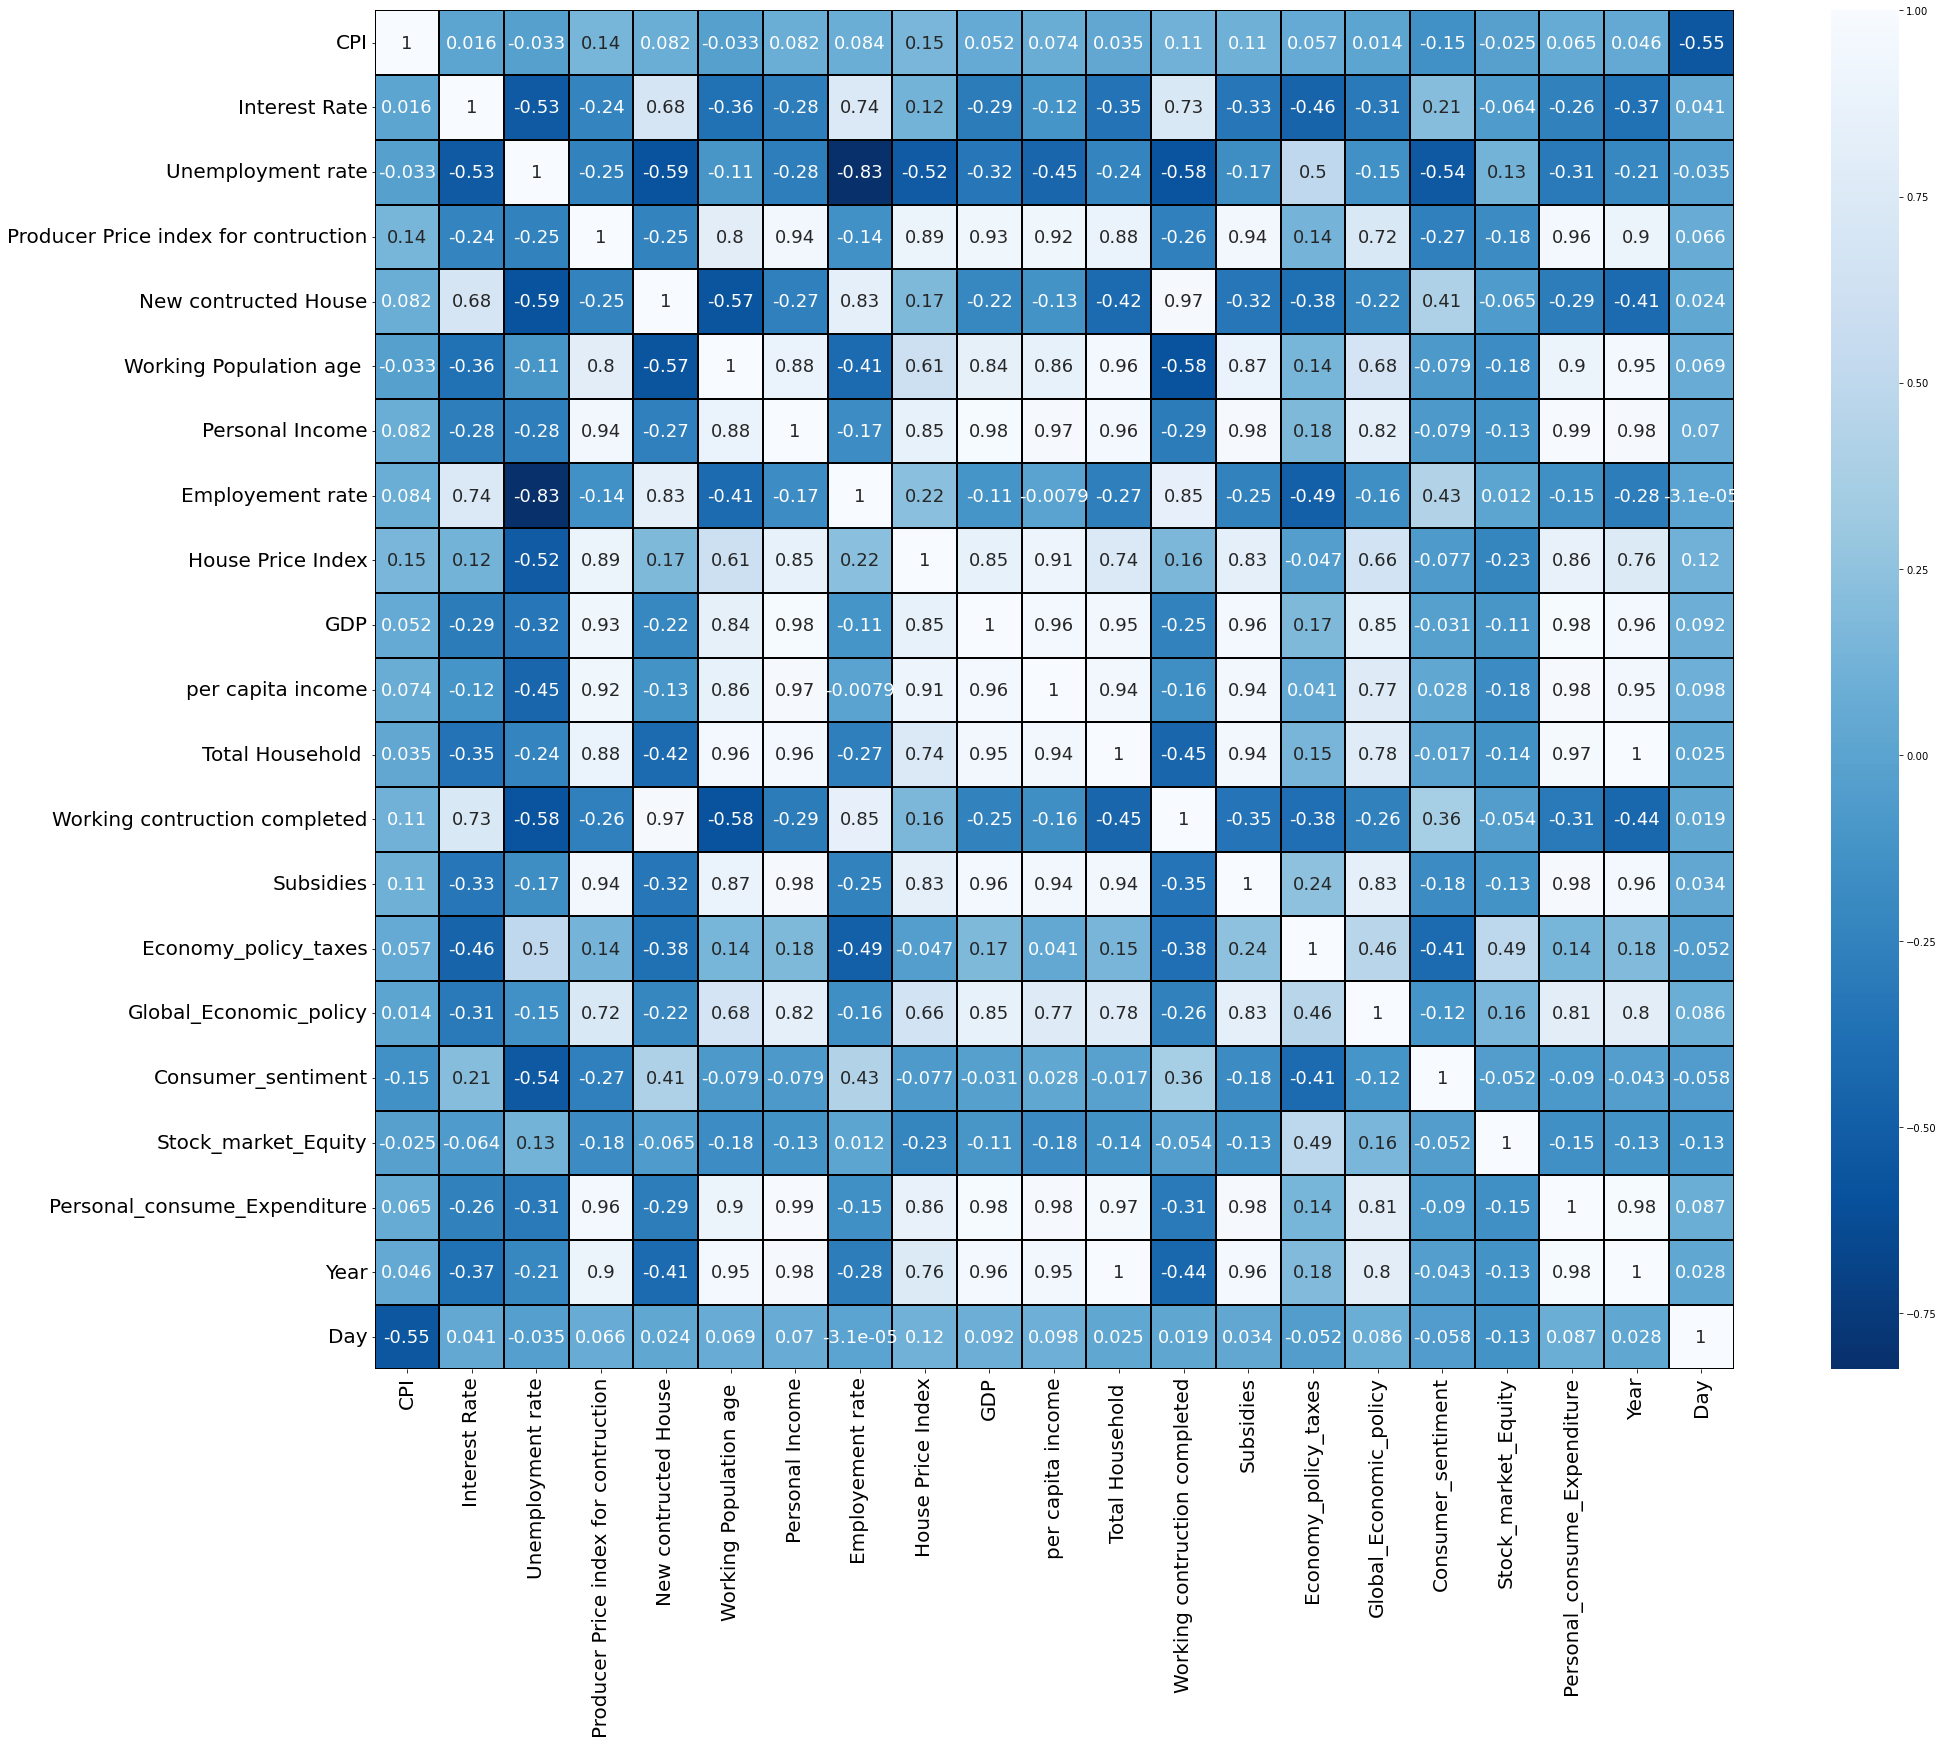

In [54]:
plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True,annot_kws={'size':18},square=True,linewidth=2,linecolor='black',cmap="Blues_r")
plt.xticks(rotation=90, fontsize=20);
plt.yticks(rotation=0, fontsize=20);
plt.show()

AS WE CAN CLEALRY SEE THAT OUR LABEL 'HOUSE PRICE INDEX' HAVE POSITIVE CORRELATION WITH 'Producer Price index for contruction' ,'PERSONAL INCOME,','GDP', 'PER CAPITA INCOME','TOTAL HOUSEHOLD','GLOBAL ECONOMY POLICY', 'PERSONAL CONSUME EXPENDITURE', 'WORKING POPULATION AGE', 'SUBSIDIES' ALL THESE HAVE POSIGIVE CORRELATION WITH OUR LABEL HOUSE PRICE INDEX OTHERS HAVE EITHER NEGATIVELY COORELATION WITH HOUSE PRICE INDEX OR ALMOST LOW POSTIVE COORELATION WITH LABEL HOUSE PRICE INDEX LET'S VISULIAZE IT MORE PROPERLY  

In [55]:
corr["House Price Index"].sort_values(ascending=False)

House Price Index                       1.000000
per capita income                       0.905772
Producer Price index for contruction    0.888754
Personal_consume_Expenditure            0.860528
Personal Income                         0.854253
GDP                                     0.852393
Subsidies                               0.833559
Year                                    0.756628
Total Household                         0.738196
Global_Economic_policy                  0.655182
Working Population age                  0.612800
Employement rate                        0.223763
New contructed House                    0.173466
Working contruction completed           0.163434
CPI                                     0.151855
Interest Rate                           0.124134
Day                                     0.115328
Economy_policy_taxes                   -0.046836
Consumer_sentiment                     -0.076736
Stock_market_Equity                    -0.230349
Unemployment rate   

In [56]:
# let's visulaize this target variable with other features 
corr_target = corr['House Price Index'].sort_values(ascending=False).drop('House Price Index')
corr_df = pd.DataFrame(corr_target)
corr_df.reset_index(inplace=True)

In [58]:
corr_df

index  House Price Index
0                      per capita income           0.905772
1   Producer Price index for contruction           0.888754
2           Personal_consume_Expenditure           0.860528
3                        Personal Income           0.854253
4                                    GDP           0.852393
5                              Subsidies           0.833559
6                                   Year           0.756628
7                       Total Household            0.738196
8                 Global_Economic_policy           0.655182
9                Working Population age            0.612800
10                      Employement rate           0.223763
11                  New contructed House           0.173466
12         Working contruction completed           0.163434
13                                   CPI           0.151855
14                         Interest Rate           0.124134
15                                   Day           0.115328
16                  Economy_policy_taxes          -0.046836
17                    Consumer_sentiment          -0.076736
18                   Stock_market_Equity          -0.230349
19                     Unemployment rate          -0.521599

#  LET;S VISULAIZE THE CORRELATION OF OUR TARGTE VARIABLE 

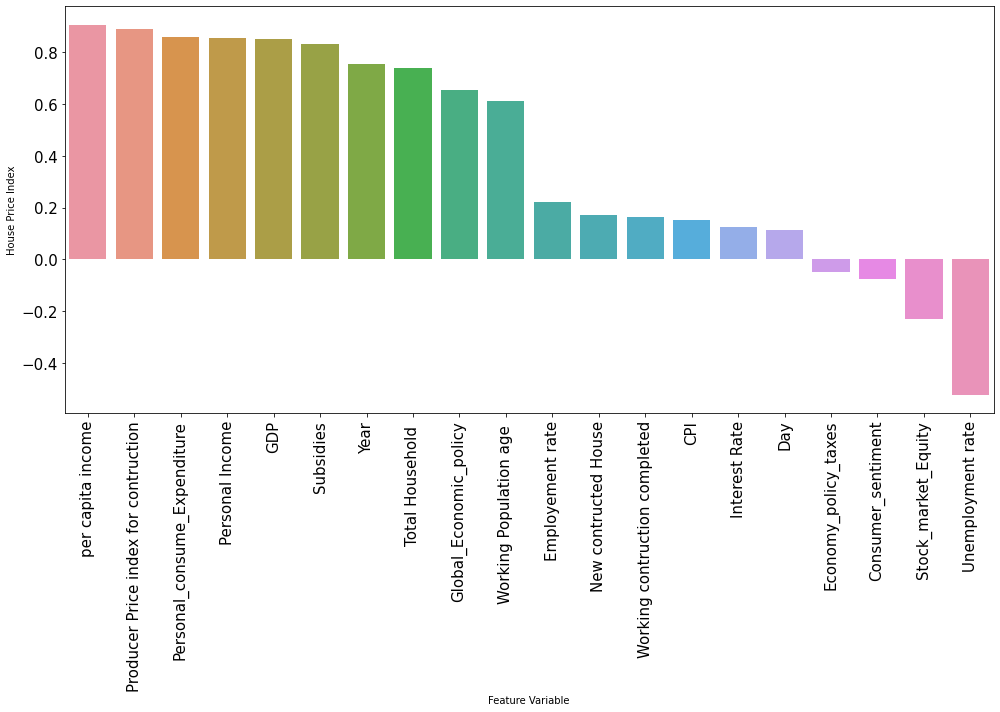

In [64]:
plt.figure(figsize=(14,10))
sns.barplot(x='index', y='House Price Index', data=corr_df)
plt.xlabel('Feature Variable')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout()
plt.show()

1. AS WE CAN CLEALRY SEE THAT HOW OURN LABEL 'HOUSE PRICE INDEX ' HAVE HIGHEST POSTIVE COORELATION WITH PER CAPITA INCOME WHICH MEAN PER CAPITA INCOME OF A PERSONE INCREASES IT HAVE ABILITY TO BUY THE HOME 

2. WE CAN ALSO SEE THAT IF 'PRODUCER PRICE INDEXFOR CONSTRCUTION INCRAESE' IT ALSO AFFECT THE HOUSE PRICE INDEX IN THE U.S REAL ESTATE MARKET 

3. WE CAN CLEALRY SEE THAT 'SUBISIDIES' DIRECTLY IMPACT THE 'HOUSE PRICE INDEX ' BECAUSE IF GOVEMERMT GIVE SUBISDIES TO THE PERSON TO BUY HOME IT EASY TO FOR THEM PURCHASE THE HOME 

4. AS WE CAN SEE THAT 'PERSONAL INCOME' OF THE PERSON INCREASE THE 'HOUSE PRICE INDESX INCREASES' BECAUSE PERSONAL INCOME INCRESE THE POWER TO REPAY THE LOAN OR MORAGE ALSO INCREASED 

5. AS WE CAN SEE THAT IF 'GDP OF THE COUNTRY ' INCREASES IT MENAS THE POWER TO BUY HOME OR HOME PRICE WILL ASO INCRESES MEANS IT IS DIRECTLU PROPRPTIONA; 

6. FROM GRAPH IT CLEALRY SEE THAT UNEMPLOYEM,ENT RATE HAVE NEAGTIVELY COORELATION WITH HOUSE PRUCE  AS BECAUSE IF A PERSON IS UNEMPLOYED HE WILL NEVER THINK TO BU HOUSE TILL HE GET JOB SO UNEMLOYEMENT INVESELY PROPEORTIONAL TO 'HOUSE PRICE INDEX' 

7. AS SIMIALRY WE CAN SEE THAT 'ECONMY POLICY TAXES' OFFUCRSE HAVE NEAGTIVELY COORELATION BECAUSE IF TAXES ARE MORE ON THE HOUSE PRICES PEOPEL WILL BUY LESS 


# SCALERIZATION

In [67]:
# TO SCALIZE THE DATA WE HAVE TO FIRST BREAK OUR DATA INTO TWO FEATURES AND VARIABLE 
x=home_prices_new.drop("House Price Index",axis=1)
y=home_prices_new["House Price Index"]

In [69]:
x.shape

(236, 20)

In [70]:
y.shape

(236,)

In [71]:
x

CPI  Interest Rate  Unemployment rate  \
0     58.7           1.73                5.7   
1    102.6           1.74                5.7   
2    146.0           1.73                5.7   
3    145.1           1.75                5.9   
4      0.0           1.75                5.8   
..     ...            ...                ...   
247   -9.2           2.33                3.7   
248   55.8           2.56                3.5   
249  105.3           3.08                3.7   
250  -26.2           3.78                3.6   
251  -79.7           4.10                3.5   

     Producer Price index for contruction  New contructed House  \
0                                   639.6                 129.8   
1                                   640.5                 132.9   
2                                   645.0                 124.0   
3                                   646.4                 129.3   
4                                   647.7                 135.6   
..                                    ...                   ...   
247                                1543.9                 107.8   
248                                1515.6                 114.4   
249                                1503.6                 107.2   
250                                1488.1                 122.8   
251                                1470.5                 110.6   

     Working Population age   Personal Income  Employement rate        GDP  \
0                      135.1             73.5             108.0   132138.0   
1                      135.3             73.6             108.4   140168.0   
2                      135.5             73.8             108.1   140509.0   
3                      135.6             74.2             107.8   149394.0   
4                      135.8             74.4             108.0   144274.0   
..                       ...              ...               ...        ...   
247                    153.4            179.5             107.1  6701519.0   
248                    153.5            180.3             107.1  6546655.0   
249                    153.5            181.3             106.8  6802375.0   
250                    153.6            181.5             106.9  6920709.0   
251                    153.6            181.9             107.3  6920709.0   

     per capita income  Total Household   Working contruction completed  \
0             50091.00          109297.0                          238.7   
1             50156.00          109297.0                          232.1   
2             50221.00          109297.0                          252.7   
3             50286.00          109297.0                          243.6   
4             50311.33          109297.0                          249.4   
..                 ...               ...                            ...   
247           65569.00          131202.0                          215.8   
248           65676.00          131202.0                          207.8   
249           65783.00          131202.0                          208.4   
250           65881.33          131202.0                          202.2   
251           65979.67          131202.0                          214.6   

     Subsidies  Economy_policy_taxes  Global_Economic_policy  \
0       24.183                172.93                  107.13   
1       24.183                 86.60                   89.99   
2       24.183                 82.61                   78.67   
3       24.183                 72.46                   83.63   
4       24.183                 76.25                   79.20   
..         ...                   ...                     ...   
247     48.021                103.00                  254.98   
248     48.021                 67.00                  279.90   
249     48.021                111.74                  298.58   
250     48.021                119.52                  329.37   
251     48.021                 95.10                  260.57   

     Consumer_sent

AS WE CAN SEE THAT WE HAVE SEPRATED OUR FEATURES AND LAVEL FROM THE DATASTE NOW WE CAN STANDARIZED OUR DATASTE 

# LET'S USE STANDARD SCALER TO STANDARIZED OUR DATASTE 

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [74]:
x

CPI  Interest Rate  Unemployment rate  \
0   -0.018106       0.240750          -0.134529   
1    0.474502       0.247100          -0.134529   
2    0.961499       0.240750          -0.134529   
3    0.951400       0.253451          -0.026906   
4   -0.676787       0.253451          -0.080717   
..        ...            ...                ...   
231 -0.780021       0.621774          -1.210757   
232 -0.050647       0.767833          -1.318380   
233  0.504799       1.098053          -1.210757   
234 -0.970780       1.542581          -1.264569   
235 -1.571111       1.745794          -1.318380   

     Producer Price index for contruction  New contructed House  \
0                               -1.487532              0.933703   
1                               -1.483013              1.024108   
2                               -1.460416              0.764559   
3                               -1.453386              0.919122   
4                               -1.446858              1.102848   
..                                    ...                   ...   
231                              3.053384              0.292122   
232                              2.911276              0.484597   
233                              2.851018              0.274624   
234                              2.773186              0.729564   
235                              2.684808              0.373778   

     Working Population age   Personal Income  Employement rate       GDP  \
0                  -2.387217        -1.453069          1.221362 -1.097076   
1                  -2.348388        -1.449676          1.358262 -1.092610   
2                  -2.309560        -1.442888          1.255587 -1.092421   
3                  -2.290145        -1.429313          1.152913 -1.087480   
4                  -2.251317        -1.422526          1.221362 -1.090327   
..                       ...              ...               ...       ...   
231                 1.165598         2.144265          0.913339  2.555940   
232                 1.185012         2.171415          0.913339  2.469826   
233                 1.185012         2.205352          0.810664  2.612023   
234                 1.204426         2.212139          0.844889  2.677825   
235                 1.204426         2.225714          0.981789  2.677825   

     per capita income  Total Household   Working contruction completed  \
0            -1.674871         -1.754632                       0.851880   
1            -1.659098         -1.754632                       0.749647   
2            -1.643325         -1.754632                       1.068737   
3            -1.627552         -1.754632                       0.927780   
4            -1.621406         -1.754632                       1.017620   
..                 ...               ...                            ...   
231           2.081000          1.645841                       0.497163   
232           2.106965          1.645841                       0.373245   
233           2.132929          1.645841                       0.382539   
234           2.156790          1.645841                       0.286502   
235           2.180653          1.645841                       0.478576   

     Subsidies  Economy_policy_taxes  Global_Economic_policy  \
0    -1.602827              1.005003               -0.492565   
1    -1.602827             -0.359732               -0.736706   
2    -1.602827             -0.422807               -0.897947   
3    -1.602827             -0.583262               -0.827297   
4    -1.602827             -0.523348               -0.890398   
..         ...                   ...                     ...   
231   2.305955             -0.100475                1.613403   
232   2.305955             -0.669575                1.968362   
233   2.305955              0.037690                2.234439   
234   2.305955              0.160679                2.673010   
235   2.305955             -0.225361                1.693026  

AS YOU CAN SEE WE HAVE STANDARIZED OUR MODEL GIVE EQUAL IMMPORTANCE TO EVERY ELEMENT NOW WE CAN CHECK MULTICOLLNEARITY AND BUILD OUR DATAS SCIENCE MODEL

# LET'S CHECK THE MULTICOLLINEARITY USING VIF TO SEE WETHER ANY INTERRELATIONSHIP BETWEEN TWO VARIBALE STRONG TOO MUCH THAT IT AFFECT MODEL 

# LET'S USE VIF TO CHECK MULTICOLLINEARITY

In [75]:
#  LET'S CHECK THE MULTICOLLINEARITY VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["VIF_value"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_data["feature"]=x.columns

In [76]:
vif_data

VIF_value                               feature
0      1.882866                                   CPI
1      7.813772                         Interest Rate
2     49.756736                     Unemployment rate
3     98.105370  Producer Price index for contruction
4     26.759755                  New contructed House
5    187.964064               Working Population age 
6    147.620731                       Personal Income
7     50.491425                      Employement rate
8    279.996765                                   GDP
9    173.948910                     per capita income
10   547.555566                      Total Household 
11    29.139817         Working contruction completed
12    78.339926                             Subsidies
13     3.371237                  Economy_policy_taxes
14     9.233572                Global_Economic_policy
15     5.333562                    Consumer_sentiment
16     1.970560                   Stock_market_Equity
17  1588.507842          Personal_consume_Expenditure
18  1013.476897                                  Year
19     4.272615                                   Day

AS WE CAN SEE THAT YES MULTICOLLINEARITY ARE PRESENT BUT WE CAN'T AFFRORD TO DROP THESE COLUMN BECAUS EIT WILL REULST IN LOSS OF HALF DATA AND ALSO LOOSE REALTIONSHIUP LABEL AND FEATURE 

# NOW LET'S BIULD OUR DATA SCIENCE  MODEL 

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from xgboost import XGBRegressor

# HERE I AM USING MANY DIFFERENT MODEL AS YOU CAN SEE ABOVE AND THEN I WILL CROOS VALIODATION TO COMPARE WHICH MODEL IS SUITABLE FOR OUR DATSTE THEN HYPETUNNING AND AFTER THAT WE ILL GET FINAL MODEL 

# LINEAR REGRESSION

In [80]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 73
Best r2_score:-  99.53855200142918


In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=73)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train=LR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.03399104180079
mean_squared_error 4.589648295257
men absolute eroor 1.7079414105109325
mean_squared_error 2.1423464461326045


# RANDOM FOREST REGRESSOR

In [84]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        RFR=RandomForestRegressor()
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 33
Best r2_score:-  99.82221981419124


In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.949432834929
mean_squared_error 4.806729270833515
men absolute eroor 1.4672708333333544
mean_squared_error 2.192425431077079


# DESCION TREE REGRESSOR

In [86]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        DTR=DecisionTreeRegressor()
        DTR.fit(X_train, y_train)
        y_pred = DTR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 29
Best r2_score:-  99.67582150059836


In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)
DTR=DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
y_pred_train=DTR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 3.143958333333334
men absolute eroor 1.3312499999999996
mean_squared_error 1.773121071256369


# GRADIENT BOOSTING REGRESSOR

In [89]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        GBR=GradientBoostingRegressor()
        GBR.fit(X_train, y_train)
        y_pred = GBR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 33
Best r2_score:-  99.82160533022721


In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.97521035441751
mean_squared_error 2.55454465746657
men absolute eroor 1.1667217051852259
mean_squared_error 1.598294296262916


# EXTRA TREE REGRESSOR

In [91]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        ETR = ExtraTreesRegressor()
        ETR.fit(X_train, y_train)
        y_pred = ETR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 13
Best r2_score:-  99.92040073622846


In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
ETR=ExtraTreesRegressor()
ETR.fit(X_train, y_train)
y_pred = ETR.predict(X_test)
y_pred_train=ETR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 0.7062930416666527
men absolute eroor 0.665166666666666
mean_squared_error 0.8404124235556331


# KNEIGHBOURS REGRESSOR

In [93]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        knn = KNR()
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 149
Best r2_score:-  99.15169646561365


In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=149)
knn=KNR()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 98.92665077005958
mean_squared_error 8.017316666666675
men absolute eroor 2.2741666666666673
mean_squared_error 2.8314866530970395


# XGB REGRESSOR 

In [114]:
def select_best_random_state_xgb(x, y):
    best_random_state = 0
    best_r2_score = 0

    for random_state in range(1, 200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        XGBR = XGBRegressor()
        XGBR.fit(X_train, y_train)
        y_pred = XGBR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score

# Assuming you have 'x' and 'y' defined somewhere
# Replace 'x' and 'y' with your actual feature and target variables

best_random_state_xgb, best_r2_score_xgb = select_best_random_state_xgb(x, y)
print("Best Random State for XGB:", best_random_state_xgb)
print("Best r2_score for XGB: ", best_r2_score_xgb * 100)


Best Random State for XGB: 131
Best r2_score for XGB:  99.76923047950595


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=131)
XGBR = XGBRegressor()
svm_regressor.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 98.96036615320476
mean_squared_error 6.586716666666689
men absolute eroor 1.9233333333333344
mean_squared_error 2.566459948385458


# SUPPORT VECTOR REGRESSOR

In [101]:
def select_best_random_state_svm(x, y):
    best_random_state = 0
    best_r2_score = 0

    for random_state in range(1, 200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        svm_regressor = SVR()
        svm_regressor.fit(X_train, y_train)
        y_pred = svm_regressor.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score

best_random_state_svm, best_r2_score_svm = select_best_random_state_svm(x, y)
print("Best Random State for SVM Regression:", best_random_state_svm)
print("Best r2_score for SVM Regression:", best_r2_score_svm * 100)

Best Random State for SVM Regression: 39
Best r2_score for SVM Regression: 72.82596724560887


In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=39)
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.00429849444407
mean_squared_error 5.935166666666675
men absolute eroor 1.8325000000000005
mean_squared_error 2.4362197492563507


# Now after doing all this we will do cross validation to test that our model overfitting or not

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cvr=cross_val_score(LR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[ 0.48254533  0.77283405  0.06094761  0.90463413 -1.25183449]
0.19382532583624235
differencve of r2_score and cross_val_score 79.35307125960134


In [104]:
cvr=cross_val_score(RFR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-1.23079487  0.83849041 -2.33220301  0.6503423  -2.36255009]
-0.8873430529543181
differencve of r2_score and cross_val_score 187.46990913865739


In [105]:
cvr=cross_val_score(GBR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-1.51246828  0.89678665 -1.97947638  0.59575384 -2.39787965]
-0.8794567620212715
differencve of r2_score and cross_val_score 186.68128004535274


In [106]:
cvr=cross_val_score(DTR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-1.05142816  0.82910078 -4.59797636 -0.07156523 -2.25984286]
-1.4303423667602702
differencve of r2_score and cross_val_score 241.7698405192526


In [107]:
cvr=cross_val_score(knn,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-2.83086113  0.61062943  0.3402209  -0.37122618 -1.82690974]
-0.8156293434672154
differencve of r2_score and cross_val_score 180.29853818994712


In [108]:
cvr=cross_val_score(ETR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-1.67992839  0.96025235 -0.34241537  0.79589572 -1.90083864]
-0.4334068646545196
differencve of r2_score and cross_val_score 142.07629030867756


In [109]:
cvr=cross_val_score(svm_regressor,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-2.77532306  0.690974   -2.93556621  0.84430505 -4.43172429]
-1.7214669039416741
differencve of r2_score and cross_val_score 270.88229423739295


In [116]:
cvr=cross_val_score(XGBR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-1.16814702  0.84170261 -3.89258793 -0.90024366 -2.24405705]
-1.4726666091769203
differencve of r2_score and cross_val_score 246.2717704960465


# HERE IAM CHOOSING THE EXTRA TREEREGRESSOR AS MY BEST MODEL BECAUSE IF CHECK THE DIFFERENCE BETWEEN THE R2 SCORE AND CROSS VALIDATION IT IS LEAST SO I DECIDED TO CHOOSE THE

# THERE IS NO NEED FOR HYPERPARAMETER TUNNING BECAUSE OUR MODEL LINEAR REGRESSION ALREDY LESS SENSITIVE ACCURACY ON VALIDATE DATA 

# HYPERPARAMETER TUNNING 

In [134]:
params= {
    'n_estimators': [100,150],  # List of values to try for n_estimators
    'max_features': ['sqrt','log2'],
    'max_depth': [2,3,],
    'min_samples_split': [2,3,],
    'min_samples_leaf': [1,2],
    'criterion': ['squared_error','absolute_error']
}

In [135]:
GSCV=GridSearchCV(ExtraTreesRegressor(),params,cv=5)

In [136]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [137]:
GSCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [138]:
home_LLC_model=ExtraTreesRegressor(n_estimators=150,max_depth=3,min_samples_leaf=2,criterion="squared_error",max_features='log2',min_samples_split=2)

In [139]:
home_LLC_model.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=3, max_features='log2', min_samples_leaf=2,
                    n_estimators=150)

In [141]:
pred=home_LLC_model.predict(X_test)

In [142]:
print("r2_score",r2_score(y_test,pred))
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9267173166301843
mean_squared_error 51.618344741902526
mean_absolute_error 5.993842101302644
root_mean_squared_error 7.184590784582134


In [143]:
import pickle
project_name="Home_LLC.pkl"
pickle.dump(home_LLC_model,open(project_name,'wb'))

In [144]:
import pickle
load_final_model=pickle.load(open('Home_LLC.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

92.67173166301843


# AS WE CAN CLEALRY SEE THAT OUR BEST MODEL IS SHOWING ACCURACY OF 92.67 % WHICH IS GOOD FOR THE MODEL 

In [145]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [147]:
target_variable_prediction

0           1           2           3           4   \
predicted  196.536243  113.348699  107.574761  107.122106  114.390859   
original   212.300000  114.800000   99.200000  102.200000  116.700000   

                   5           6           7           8           9   ...  \
predicted  118.308071  102.049621  107.773763  108.529372  112.609465  ...   
original   128.700000   97.600000   95.500000  103.900000  111.300000  ...   

                   38          39          40          41          42  \
predicted  116.412325  118.240548  117.564072  108.964344  114.578217   
original   125.900000  128.100000  128.400000   95.000000  113.900000   

                   43          44          45          46          47  
predicted  117.349316  100.527035  116.740694  108.268183  107.460315  
original   127.700000   95.800000  116.500000  103.300000  100.100000  

[2 rows x 48 columns]

# AS WE CAN CLEALRY SEE THAT FROM FEW OBSERVATION ABOVE THAT ALMOSTR ALL OUR OBERVATION ARE CLOSE TO EACH OTHER 
# YOU CAN SEE FOR 196 WAS ORIGINAL AND WE GET 212 SIMILALRY FOR 2 WE GET 114 EVEN THE OBSEVATION WAS 113  SMILALRY FOR FURTHER HERE ARE THE RESULT ALMOST ALL OBSEVATION ARE CORRECT ALMOST CLOSE TO WHAT ORIGINAL HOME PRICE 

# PREDICTED HOME PREICE IS ALMOST CLOSE TO ORIGINAL HOME PRICE SO WE CAN SAY OUR DATA SCIENCE MODEL IS COORECT 

# CONCLUSION :- 
# ACCORDING TO THE DATSTE AND ANALYSIS WE COME TO THE CONCLUSION THAT "PER CAPITA INCOME" DOSEN'T MATTER WHAT EFECTING IT BUT IT IS THE MOST IMPORT FACTOR IN HOUSE PRICE AS IT GIVE POWER TO BUY HOUSE AND ALSO INCFREASE HOUSE PRICE 
# AFTR THAT "PERSONAL EXPENDITURE" , "GDP", " CONSTRUCTION COST", "PERSONAL INCOME", "SUBSIDIES" THESE FACTOR ARE HIGHLY COOREALTED WITH HOUSE PRICE AND HIGHLY AFFECT THE HOUSE PRICE IN THE U.S 